#Scenario Import

In [ ]:
#On importe les matrices d'adjacence des scénarios:
#Scénario 1
with open('/content/scenario1.txt') as f: #attention à bien réimporter les fichiers et à éventuellement modifier le chemin d'accès
    G1 =[]
    i = 0
    for line in f:
      if i ==0:
        k1 = line.strip()
        k1 = int(k1[0])
      if i== 1 :
        n1 = line.strip()
        n1 = int(n1[0])
      if i > 1:
        values = line.strip().split()
        G1.append([int(value[0]) for value in values])
      i+=1

      

#Scénario 2
with open('/content/scenario2.txt') as f: #attention à bien réimporter les fichiers et à éventuellement modifier le chemin d'accès
    G2 =[]
    i = 0
    for line in f:
      if i ==0:
        k2 = line.strip()
        k2 = int(k2[0])
      if i== 1 :
        n2 = line.strip()
        n2 = int(n2[0])
      if i > 1:
        values = line.strip().split()
        G2.append([int(value[0]) for value in values])
      i+=1

#Scénario 3
with open('/content/scenario3.txt') as f: #attention à bien réimporter les fichiers et à éventuellement modifier le chemin d'accès
    G3 =[]
    i = 0
    for line in f:
      if i ==0:
        k3 = line.strip()
        k3 = int(k3[0])
      if i== 1 :
        n3 = line.strip()
        n3 = int(n3[0])
      if i > 1:
        values = line.strip().split()
        G3.append([int(value[0]) for value in values])
      i+=1

#Scénario 4
with open('/content/scenario4.txt') as f: #attention à bien réimporter les fichiers et à éventuellement modifier le chemin d'accès
    G4 =[]
    i = 0
    for line in f:
      if i ==0:
        k4 = line.strip()
        k4 = 4
      if i== 1 :
        n4 = line.strip()
        n4 = 16
      if i > 1:
        values = line.strip().split()
        G4.append([int(value[0]) for value in values])
      i+=1


#Scénario 5
with open('/content/scenario5.txt') as f: #attention à bien réimporter les fichiers et à éventuellement modifier le chemin d'accès
    G5 =[]
    i = 0
    for line in f:
      if i ==0:
        k5 = line.strip()
        k5 = 4
      if i== 1 :
        n5 = line.strip()
        n5 = 25
      if i > 1:
        values = line.strip().split()
        G5.append([int(value[0]) for value in values])
      i+=1


#Scénario 6
with open('/content/scenario6.txt') as f: #attention à bien réimporter les fichiers et à éventuellement modifier le chemin d'accès
    G6 =[]
    i = 0
    for line in f:
      if i ==0:
        k6 = line.strip()
        k6 = 50
      if i== 1 :
        n6= line.strip()
        n6 = 500
      if i > 1:
        values = line.strip().split()
        G6.append([int(value[0]) for value in values])
      i+=1





      

In [ ]:
#On remplace les poids nuls par des poids infinis et on met les matrices sous forme de np array
#On considère vu la taille des données que l'on peut prendre max_int égal à 1O^9
import numpy as np

max_int = 10000000

def z_to_inf(A):
  for i in range(len(A)):
    for j in range(len(A[i])):
      if A[i][j]==0 and i!= j:
        A[i][j]= max_int
  return A







#while len(S6[0][393])<len(S6[0][0]):
  #S6[0][393].append(max_int)

In [ ]:
G1= np.array(z_to_inf(G1))
G2= np.array(z_to_inf(G2))
G3= np.array(z_to_inf(G3))
G4= np.array(z_to_inf(G4))
G5= np.array(z_to_inf(G5))
G6= np.array(z_to_inf(G6))

In [ ]:
S1 = [G1,k1,n1]
S2 = [G2,k2,n2]
S3 = [G3,k3,n3]
S4 = [G4,k4,n4]
S5 = [G5,k5,n5]
S6 = [G6,k6,n6]

#Graph Drawing

In [ ]:
!pip install scipy==1.8.0
!pip install networkx==2.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [ ]:
from scipy import sparse #sert pour les gros graphes tels que le 6e

In [ ]:
 # fonction pour dessiner un graphe donné
 
%matplotlib inline
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt 
 
 def show_graph(S,stat = False,loc = None):
    A,k,n = S[0],S[1],S[2]
    graph = nx.Graph()
    for i in range(n):
      for j in range(n):
        if A[i][j] < max_int  and A[i][j]> 0 :
          graph.add_edge(("{}".format(i)), ("{}".format(j)), weight = A[i][j],color = 'b')
        
        if A[i][j] == max_int + 10: #deleted edge pre_process 1
            graph.add_edge(("{}".format(i)), ("{}".format(j)), weight = 1,color = 'y')
        if A[i][j] == max_int + 11: #deleted edge pre_process 2
            graph.add_edge(("{}".format(i)), ("{}".format(j)), weight = 2,color = 'g')
        if A[i][j] == max_int + 12: #deleted edge pre_process 3
            graph.add_edge(("{}".format(i)), ("{}".format(j)), weight = 3,color = 'r') 
    
    #initialze Figure
    if n < 100:
      plt.figure(num=None, figsize=(5, 5), dpi=80)
    else:
        plt.figure(num=None, figsize=(25, 25), dpi=80)

    plt.axis('off')
    fig = plt.figure(1)
   
    if stat :
      nodelist = [u for (u,v) in graph.nodes(data=True)]
      pos ={}
      for u in nodelist:
        pos[u]= loc[int(u)]
      #print(len(pos))
      #print(pos)
    else:  
      pos = nx.spring_layout(graph, seed = 1)
      #print(len(pos))
    #pos = nx.circular_layout(graph)

    edges = graph.edges()
    nodes_in_k = [u for (u,v) in graph.nodes(data=True) if int(u)< k]
    nodes_not_in_k =[u for (u,v) in graph.nodes(data=True) if int(u) >= k]
    colors = [graph[u][v]['color'] for u,v in edges]
    weights = [graph[u][v]['weight'] for u,v in edges]

    
    nx.draw_networkx_nodes(graph,pos,nodelist= nodes_in_k, node_color="tab:red")
    nx.draw_networkx_nodes(graph,pos,nodelist= nodes_not_in_k, node_color="tab:blue")
    nx.draw_networkx_edges(graph,pos,edge_color=colors, width=weights)
    nx.draw_networkx_labels(graph,pos)
    edge_labels = nx.get_edge_attributes(graph, "weight")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels)

    #cut = 1.00
    #xmax = cut * max(xx for xx, yy in pos.values())
    #ymax = cut * max(yy for xx, yy in pos.values())
    #plt.xlim(0, xmax)
    #plt.ylim(0, ymax)

    #plt.savefig(file_name,bbox_inches="tight")
    #pylab.close()
    #del fig

#Question 1

Montrons qu'un arête connectée à un sommet non-terminal de degré 1 ne peut être dans un arbre de Steiner minimal. Supposons par l'absurde disposer d'un tel arbre. Alors retirer ce sommet et cette arête de l'arbre donne toujours un arbre car on a toujours un graphe connexe à une arête de moins que le nombre de sommet, et cet arbre recouvre tous les terminaux et est de poids strictement inférieur, ce qui est absurde.

# Question 2

L'algorithme ici consiste en pour chaque sommet non-terminal regarder si son degré vaut un et effacer son unique arête si tel est le cas (on choisit max_int =10^6 pour le poids d'une telle arête).

In [ ]:
import numpy as np

# On utilise une matrice d'adjacence sous forme de listes python pour G contenant des couples [sommet,coût] où les sommets sont numérotés de 0 à n-1 = len(G) -1, 
#et un entier k pour désigner que les sommets de 0 à k-1 sont dans K


# On implémente le premier pré processing des données :


def pre_process1 (S,show_deleted_edges = 0):  #show_deleted_edges prend la valeur 1 si on veut montrer les arêtes effacées, zéro sinon
  A,k,n = S[0], S[1],S[2] 
  G = A.copy()
  
  for i in range(k,n) : 
    voisins = np.argwhere(np.logical_and((0<G[i]), (G[i]< max_int) ))
    if len(voisins) == 1:
      j = voisins[0][0]
      G[i][j]= max_int + show_deleted_edges*10
      G[j][i]= max_int + show_deleted_edges*10
      
  return [G,k,n]


In [ ]:
#Test sur les différents scénarios :

import time 
print(len(S6[0]))

start_time = time.time()

Sp = pre_process1(S6,1)

print("--- %s seconds ---" % (time.time() - start_time))



500
--- 0.01333475112915039 seconds ---


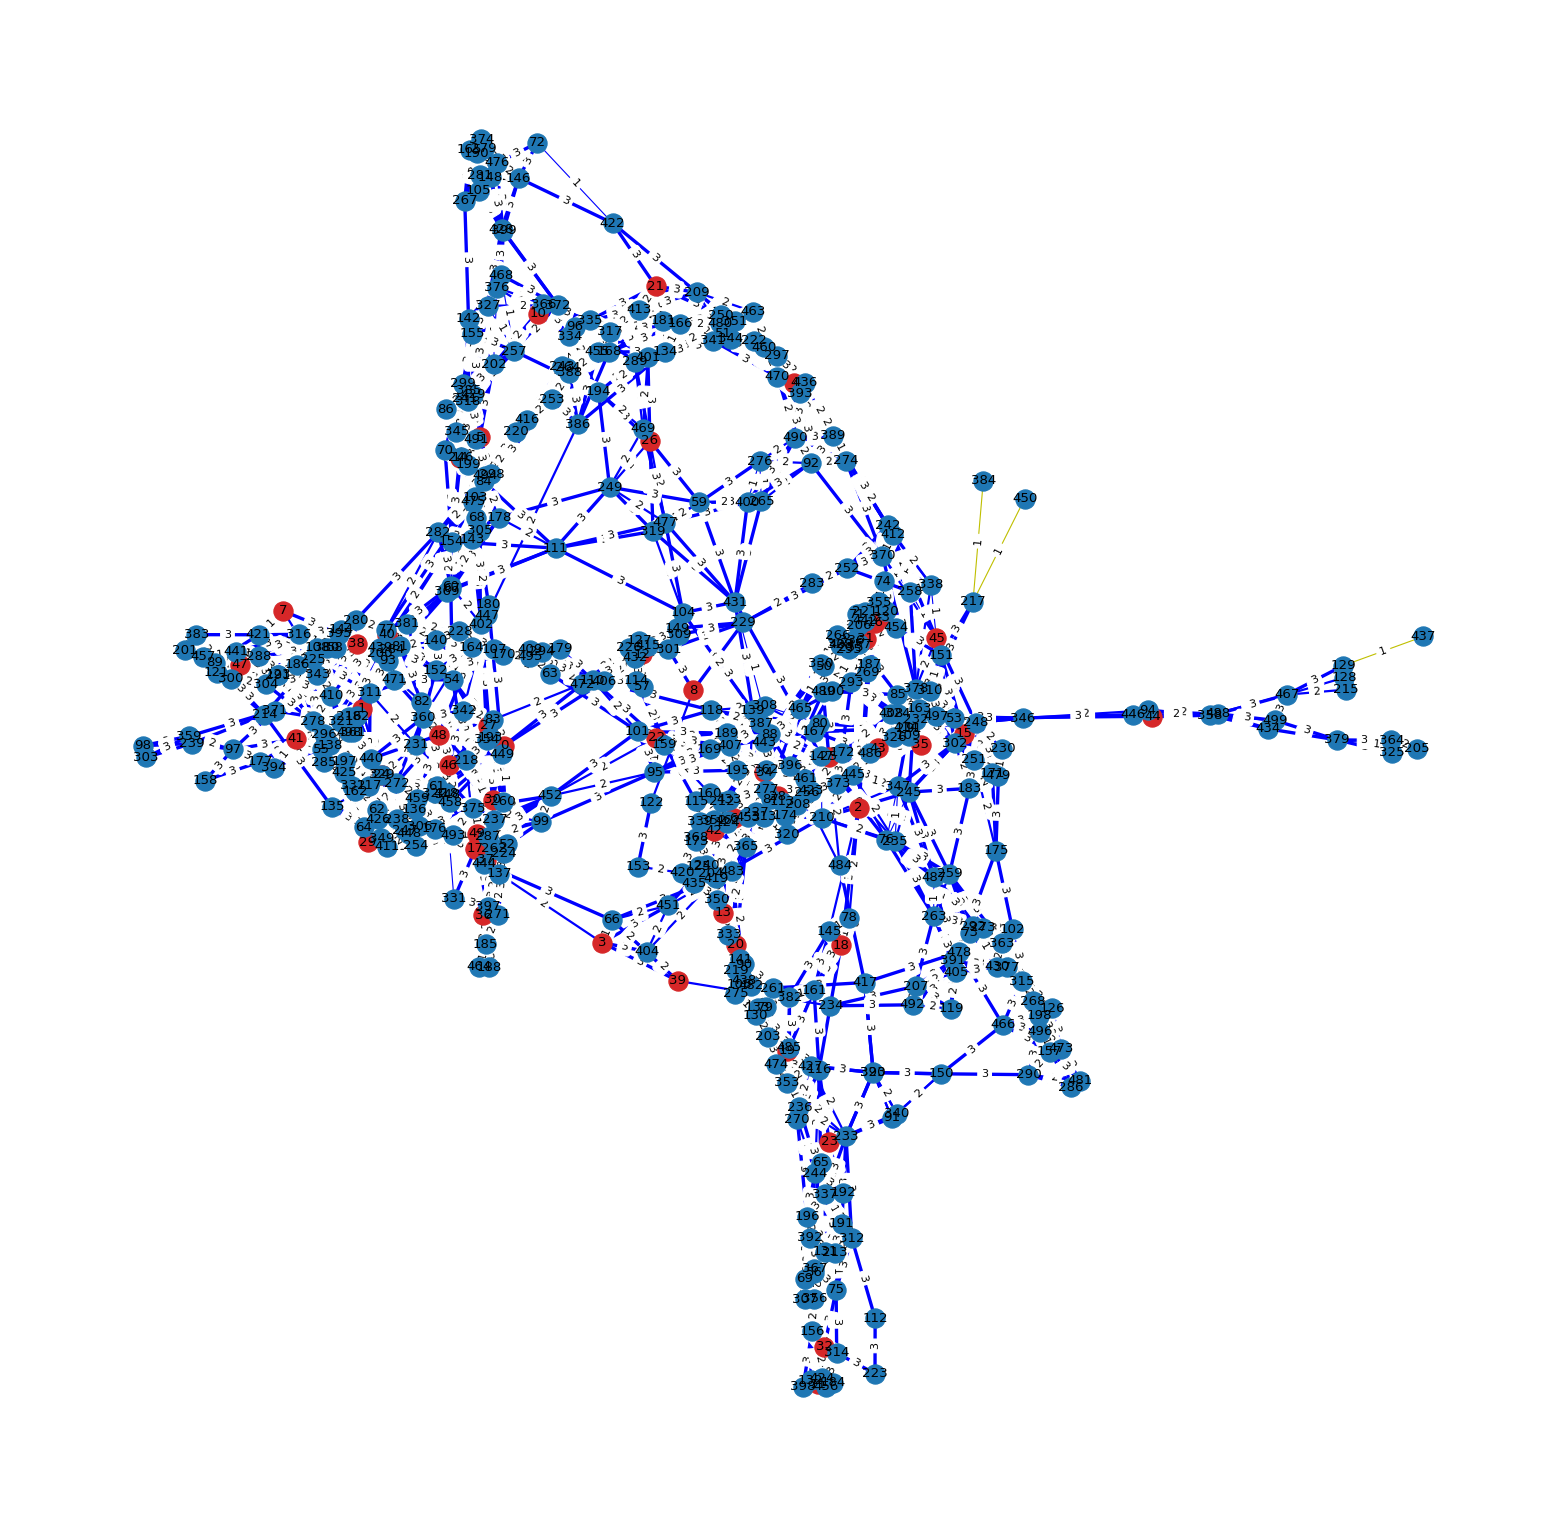

In [ ]:
show_graph(Sp)

# Question 3

Soit un sommet non terminal de degré 2 noté $v_k$, relié à $v_i$ et $v_j$ par respectivement $e_1$ et $e_2$, et on note $e=(v_i,v_j).$

Si $c(e_1) +c(e_2) \geq c(e)$, alors on considère un arbre de Steiner minimal $T$  contenant $v_k$ (s'il ne le contient pas c'est déjà bon). Alors $v_k$ est de degré au moins $2$ dans $T$ d'après la question $1$. Quitte à renommer les sommets, on peut supposer que $v_i$ et $v_j$ sont dans $T$ et tous les deux de degré deux de même dans $T$.. Alors l'arête $e$ n'étant pas dans $T$ car sinon on aurait un trois-cycle dans $T$, en retirant $e_1$ et $e_2$ et donc $v_k$ (car de degré $2$) puis en rajoutant $e$ on obtient toujours un arbre car ce nouveau graphe est connexe et a toujours un sommet de plus que son nombre d'arête.

Si $c(e_1) +c(e_2) < c(e)$, et que par l'absurde on dispose d'un arbre de Steiner minimal $T$ contenant $e$, alors $e_1$ et $e_2$ ne sont pas dans $T$ car si les deux y sont on a un cycle et si un seul y est $v_k$ devient un sommet non terminal de degré $1$ dans $T$, impossible par $1$. Alors, en supprimant $e$ et en rajoutant $e_1$,$e_2$ et donc $v_k$ on obtient par les mêmes arguments un arbre de Steiner de poids strictement inférieur à $T$, d'où le résultat par contradiction.

#Question 4

Dans cet algorithme, on  examine chacun des sommets du graphe et détermine s'il est de degré $2$, auquel cas on détermine dans lequel des deux cas de la question précédente on se trouve, afin de supprimer le sommet ou l'arête inutile.

In [ ]:
def pre_process2 (S,show_deleted_edges = 0): 
  A,k,n = S[0], S[1],S[2]
  G = A.copy()
  for i in range(k,n) : 
    voisins = np.argwhere(np.logical_and(0<G[i], G[i]< max_int ))
    if len(voisins) == 2:
      
      j = voisins[0][0]
      l = voisins[1][0]
      cj = G[i][j]
      cl = G[i][l]
      c = G[j][l]
      if c < max_int : #if c (j,l) does not exist, nothing to do
        if cl + cj < c: #delete (j,l)
          G[j][l] = max_int + show_deleted_edges*11
          G[l][j] = max_int + show_deleted_edges*11
        else : #delete i
          G[i][l] = max_int + show_deleted_edges*11
          G[i][j] = max_int + show_deleted_edges*11
          G[j][i] = max_int + show_deleted_edges*11
          G[l][i] = max_int + show_deleted_edges*11
      
  return [G,k,n]

In [ ]:
#Test 
 
start_time = time.time()

Sp = pre_process2(S6,1)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.00818943977355957 seconds ---


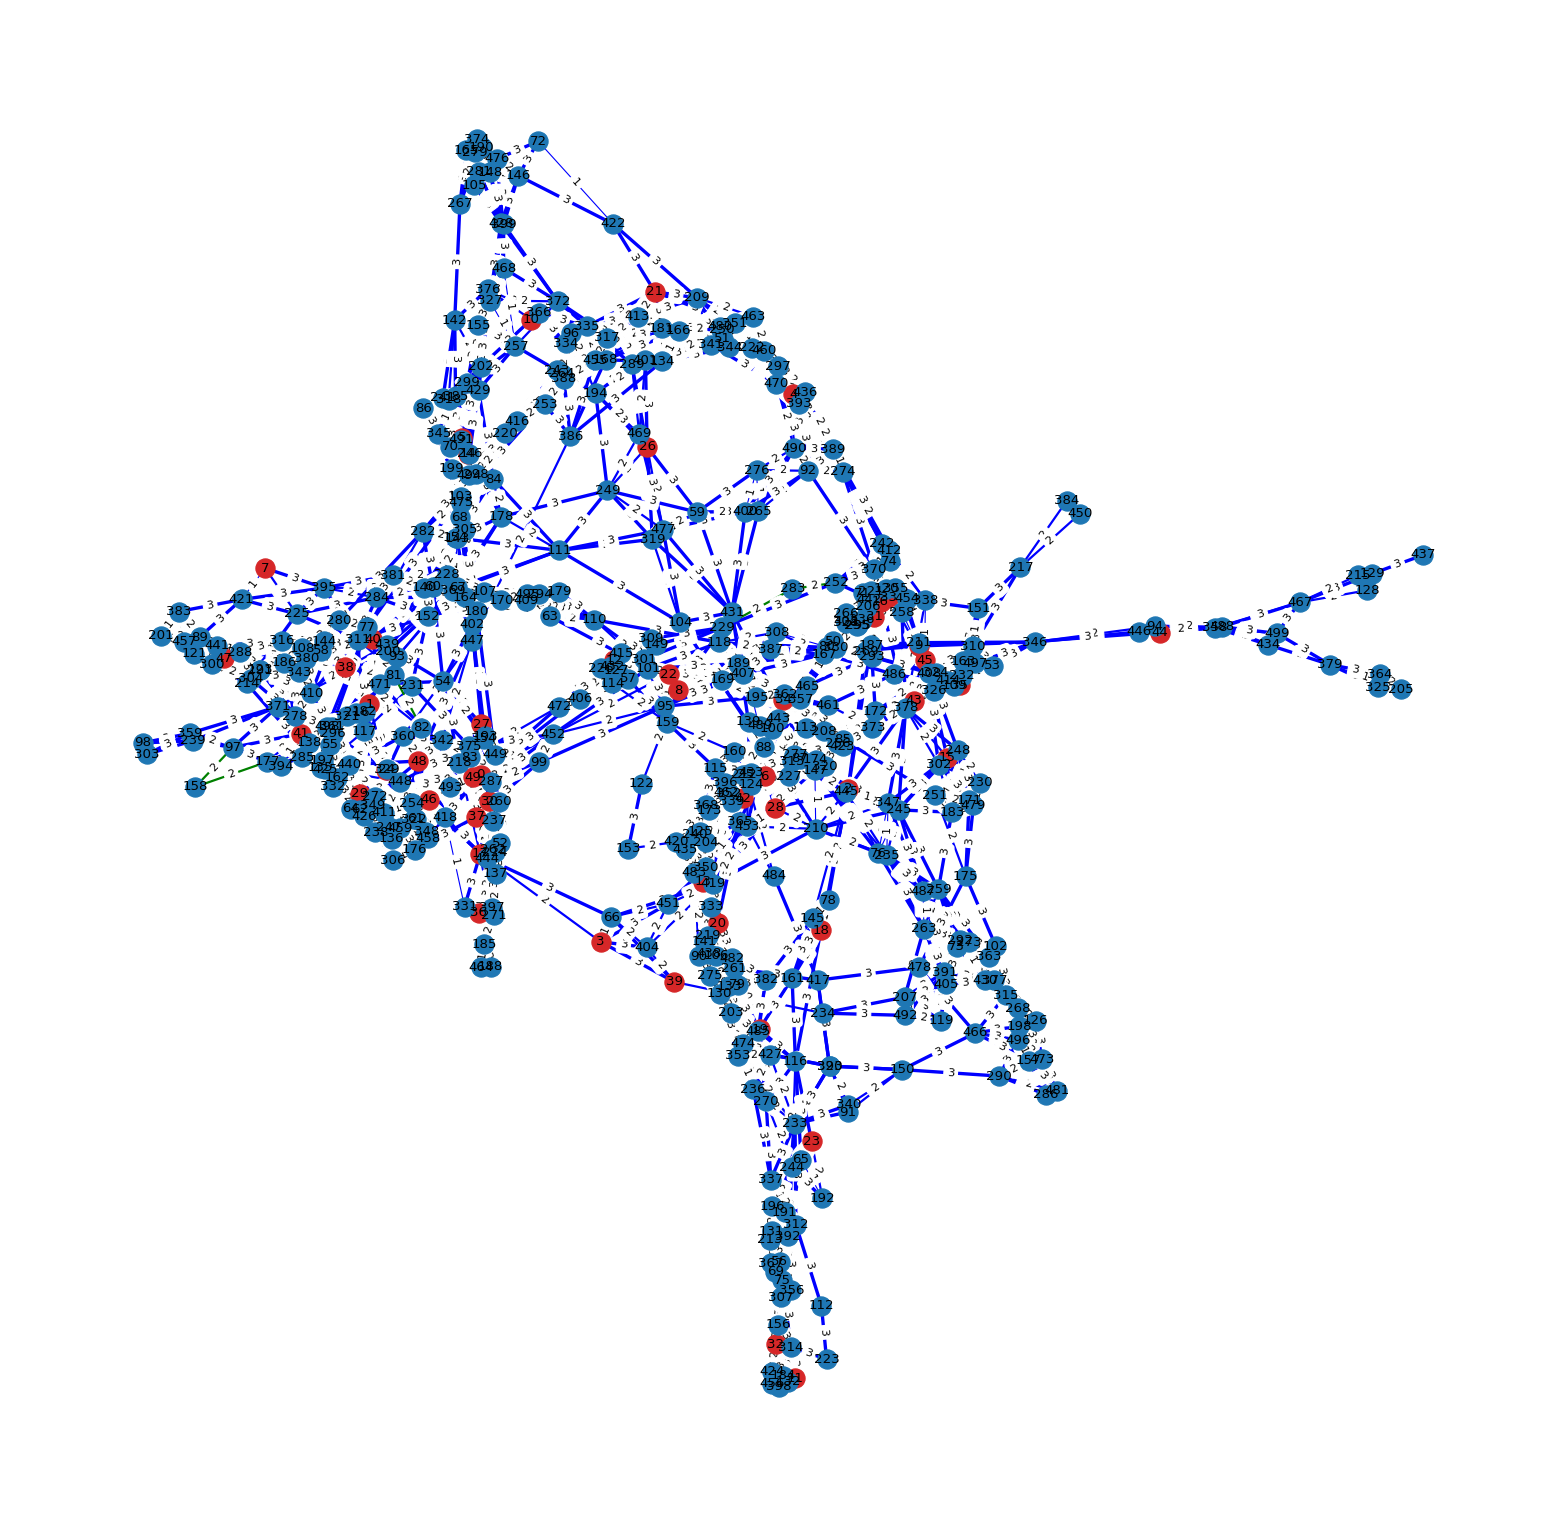

In [ ]:
show_graph(Sp)

# Question 5

Soit une arête $e=(v_i,v_j)$ telle que $c(e)>d(v_i,v_j)$. On construit un arbre de Steiner minimal $T$ à partir du graphe complet des distances puis en remontant les chemins les plus courts. Alors, puisque $e$ n'est pas sur le chemin le plus court de $v_i$ à $v_j$, on sait que $e$ n'est pas dans $T$. Donc il existe un arbre de Steiner minimal ne contenant pas $e$, et donc on peut supprimer $e$.

#Question 6

In [ ]:
# On implémente d'abord l'algorithme de Floyd-Warshall

def FW(A):
  D = A.copy()
  n = len(A)
  for r in range(n):
    for i in range(n):
      for j in range(n):
        if D[i][j] > D[i][r] + D[r][j]:
          D[i][j] = D[i][r] + D[r][j]
  return D

def FW2(A):
  D = A.copy()
  n = len(A)
  Pred=-1*np.ones((n,n))
  for i in range (0,n):
    for j in range (0,n):
      try:
        if 0<D[i][j]<max_int:
          Pred[i][j]=i
      except:
        print(i,j)
  for r in range(0,n):
    for i in range(0,n):
      for j in range(0,n):
        if D[i][j] > D[i][r] + D[r][j] > 0:
          D[i][j]=D[i][r] + D[r][j]
          Pred[i][j]=Pred[r][j]
  return D,Pred


In [ ]:
# On peut maintenant implémenter la troisième phase de pre processing

def pre_process3(S,D,show_deleted_edges = 0):
  A,k,n = S[0], S[1],S[2]
  
  G = A.copy()
  for i in range(n) : 
    for j in range(n): #on enlève aussi les sommets de K 
      if G[i][j] > D[i][j] :
        if G[i][j] < max_int   : #arête existante
          G[i][j] = max_int + show_deleted_edges*12
      
  return [G,k,n]


In [ ]:
 # Temps d'exécution de l'algorithme de Floyd-Warshall sur le sixième scenario
 # Puisque c'est trop long on le fait à l'avance et on le donne en argument en au pre-processing
start_time = time.time()
D6,P6 = FW2(G6)


print("--- %s seconds ---" % (time.time() - start_time))

--- 109.81628751754761 seconds ---


In [ ]:
start_time = time.time()

Sp = pre_process3(S6,D6,1)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.2491154670715332 seconds ---


In [ ]:
#nombre d'arêtes effacées :
Gp = Sp[0]
print("On a effacé " + str(len(np.argwhere(G6 < max_int))-len(np.argwhere(Gp < max_int))) + " arêtes")

On a effacé 0 arêtes


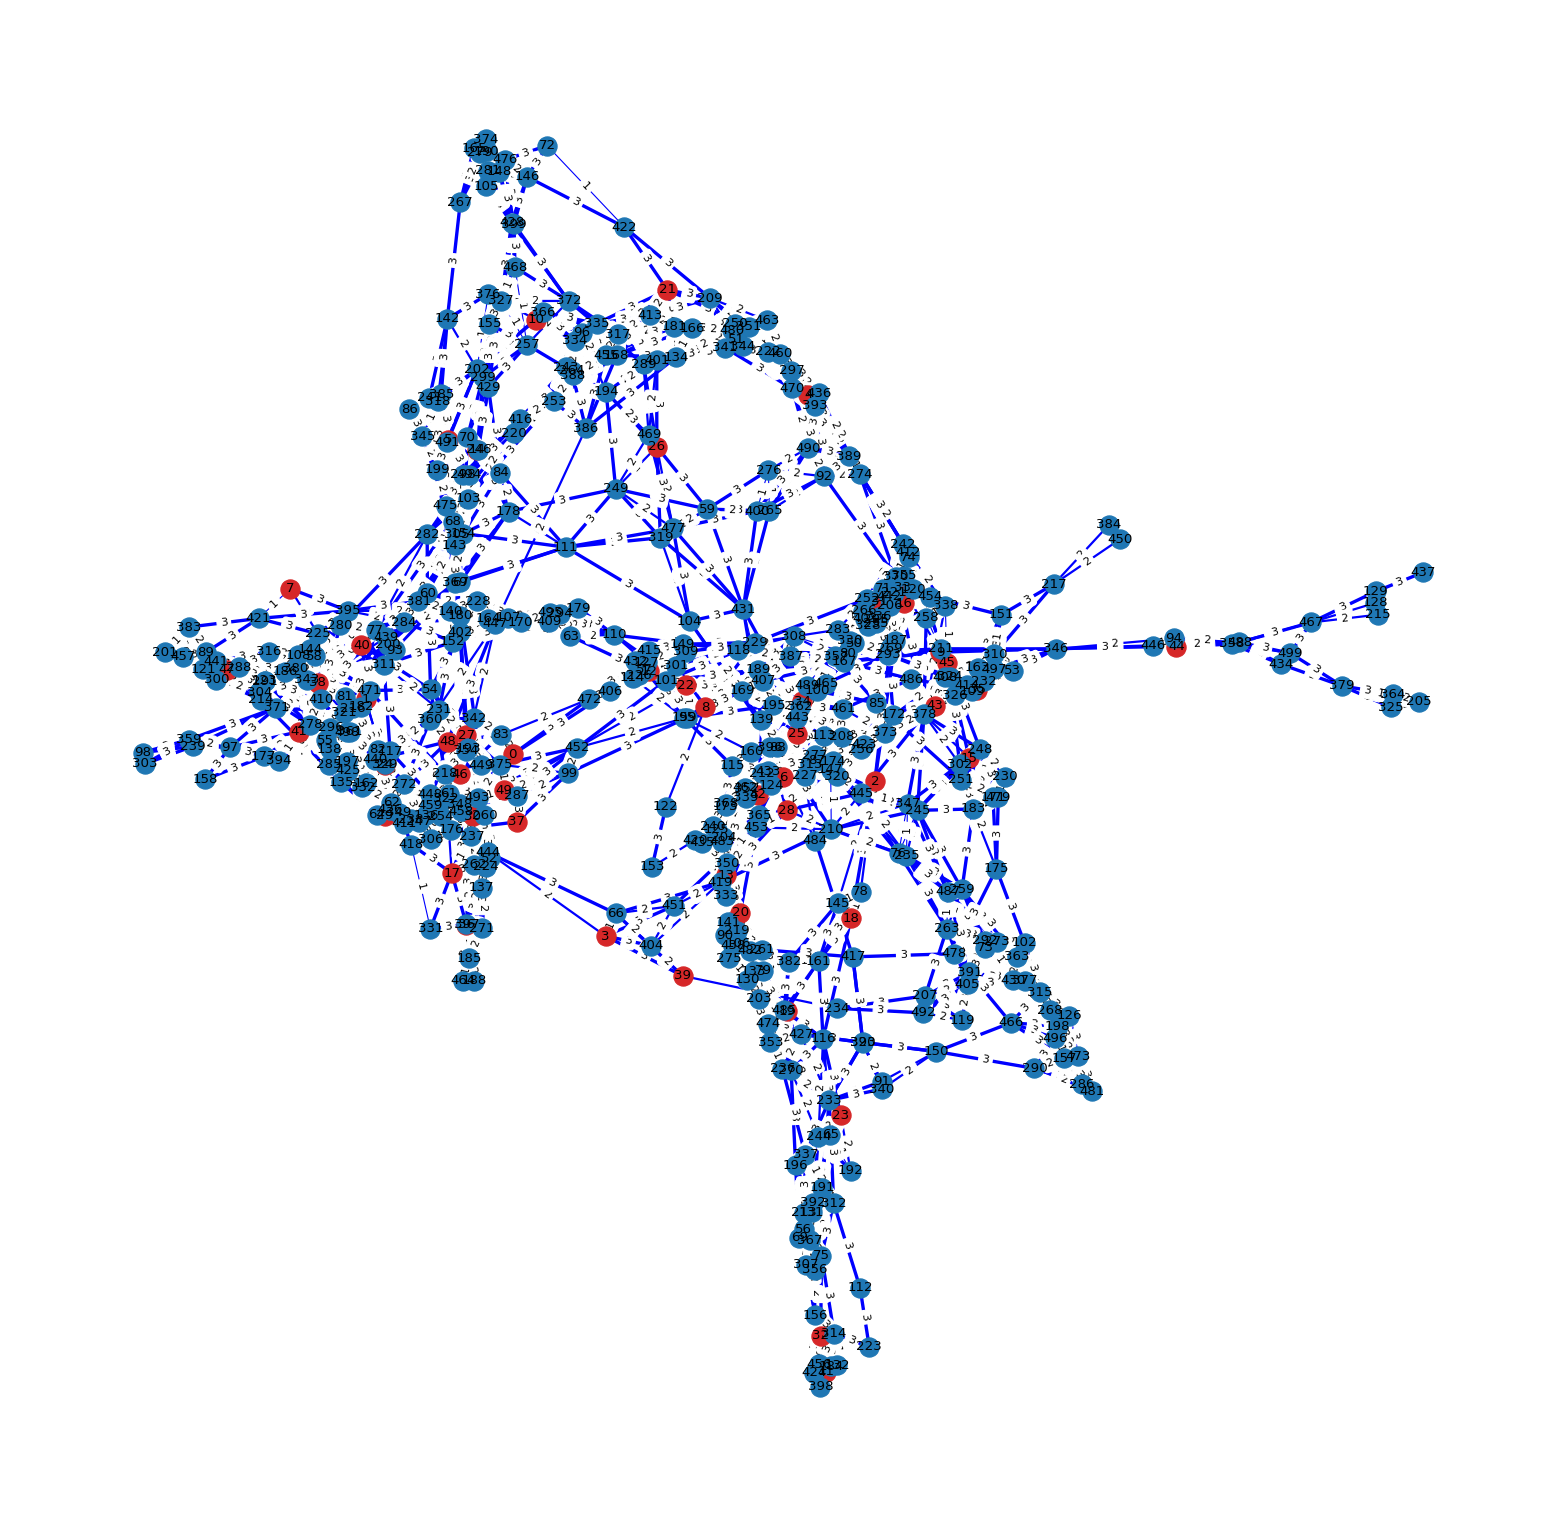

In [ ]:
show_graph(Sp)

#Pre-processing complet

In [ ]:
#On code ici un enchainement optimal des 3 types de pre processing de données déjà présentés

def test_1(S): #teste si un pre processing de type 1 est nécessaire 
  A,k,n = S[0], S[1],S[2] 
  
  
  for i in range(k,n) : 
    voisins = np.argwhere(np.logical_and(0<A[i], A[i]< max_int ))
    if len(voisins) == 1:
      return True
  return False

def test_2(S): #teste si un pre processing de type 1 est nécessaire 

  G,k,n = S[0], S[1],S[2]

  for i in range(k,n) : 
    voisins = np.argwhere(np.logical_and(0<G[i], G[i]< max_int ))
    if len(voisins) == 2:
      j = voisins[0][0]
      l = voisins[1][0]
      cj = G[i][j]
      cl = G[i][l]
      c = G[j][l]
      if c < max_int:
        return True
  return False

def test_3(S,D): #teste si un pre processing de type 1 est nécessaire 

  G,k,n = S[0], S[1],S[2]
  
  
  for i in range(n) : 
    for j in range(n): #on enlève aussi les sommets de K 
      if G[i][j] > D[i][j] :
        if G[i][j] < max_int  : #arête existante
          return True
      
  return False

In [ ]:
def pre_process(S,D,show_deleted_edges =0):
  encore = True
  Sp = S.copy()
  while encore :
    if test_2(Sp):
      Sp = pre_process2(Sp,show_deleted_edges)
    else : 
      if test_1(Sp):
        Sp = pre_process1(Sp,show_deleted_edges)
      else :
        if test_3(Sp,D):
          Sp = pre_process3(Sp,D,show_deleted_edges)
        else: 
          encore = False
  return Sp

In [ ]:
# on calcule les matrices de distance pour chacun des graphes
D1 = FW(S1[0])
D2 = FW(S2[0])
D3 = FW(S3[0])
D4 = FW(S4[0])
D5 = FW(S5[0])
D6 = FW(S6[0])

In [ ]:
# on en deduit les versions "pre-processed" des graphes
Sp1=pre_process(S1,D1)
Sp2=pre_process(S2,D2)
Sp3=pre_process(S3,D3)
Sp4=pre_process(S4,D4)
Sp5=pre_process(S5,D5)
Sp6=pre_process(S6,D6)


2 oui
2 non
1 oui
2 non
1 non
3 oui
2 non
1 non
3 non
2 oui
2 non
1 oui
2 non
1 non
3 non
2 oui
2 non
1 oui
2 non
1 non
3 non
2 oui
2 non
1 oui
2 non
1 non
3 oui
2 non
1 non
3 non
2 non
1 non
3 non
2 oui
2 non
1 oui
2 oui
2 non
1 non
3 non


In [ ]:
#We calculate the distance matrix D and the nxn matrix P which keeps track of the various paths
Dp1,P1 = FW2(Sp1[0])
Dp2,P2 = FW2(Sp2[0])
Dp3,P3 = FW2(Sp3[0])
Dp4,P4 = FW2(Sp4[0])
Dp5,P5 = FW2(Sp5[0])
Dp6,P6 = FW2(Sp6[0])

In [ ]:
 
start_time = time.time()

Sp = pre_process(S2,D2,1)

print("--- %s seconds ---" % (time.time() - start_time))

2 oui
2 non
1 oui
2 non
1 non
3 non
--- 0.008529901504516602 seconds ---


In [ ]:
#number of edges removed
Gp = Sp[0]
print("On a effacé " + str(len(np.argwhere(G1 < max_int))-len(np.argwhere(Gp < max_int))) + " arêtes")

On a effacé 24 arêtes


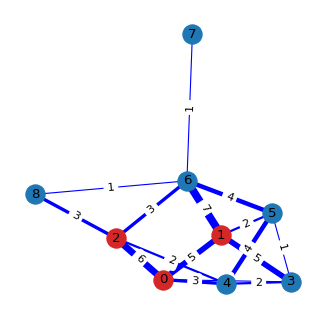

In [ ]:
show_graph(S1)

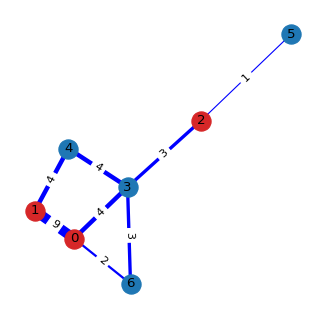

In [ ]:
show_graph(S2)

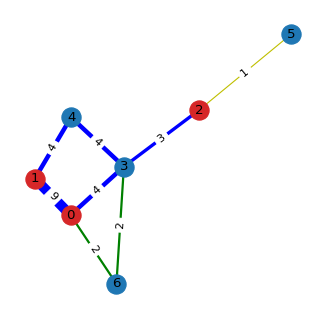

In [ ]:
show_graph(Sp)

(Seules les arêtes bleues sont encore dans le graphe, les autres ont été retirées par le pre processing correspond à leur poids affiché)

# Implémentation du tas de Fibonacci


In [ ]:
#implementation of the fibonacci heap. Source : GitHub MIT

def makefheap():
    """make-heap in Cormen et al."""
    heap = Fheap()
    return heap
def fheappush(heap, item):
    """insert in Corment et al."""
    heap.insert(Node(item))
def getfheapmin(heap):
    """minimum in Corment et al."""
    return heap.min.key
def fheappop(heap):
    """extract-min in Corment et al."""
    return heap.extract_min().key
def fheapunion(heap, other):
    """union in Corment et al."""
    heap.union(other)

class Node:
    """Methods:
    - add_child: add a child to the node
    - remove_child: remove a child to the node
    """

    def __init__(self, key, p=None, left=None, right=None,
                 child=None, mark = None):
        """Create a new node in a heap. Attributes:
        - key: the node's key, a number
        - left, right: the node's adjacent siblings. The node and its siblings
        are doubly linked, so they form a circular loop. If x is an only child,
        it is its own left and right sibling.
        - child: the representative child of the node. To access all the
        children of the node, first access the representative child through
        self.child, then access all the child's siblings through self.left or
        self.right.
        - p: the node's parent
        - degree: the number of the node's children whether the node has lost a
        child since the last time it was made the child of another node. Newly
        created nodes are unmarked. A node becomes unmarked whenever it is made
        the child of another node.
        """
        self.key = key
        self.left = left
        self.right = right
        self.p = p # parent
        self.child = child # to any one of its children
        self.degree = 0
        self.mark = False if not mark else mark

    def add_child(self, x):
        """Add a child to the node. If the node currently has no children, the
        child is made the representative child, otherwise, it is added to the
        right of the representative child.

        This procedure updates the child's parent and mark,
        and the node's degree.
        """
        if not self.child:
            self.child = x
            x.left, x.right = x, x
        else:
            right_to_child = self.child.right
            self.child.right = x
            x.left = self.child
            x.right = right_to_child
            right_to_child.left = x
        x.p = self
        self.degree += 1
        x.mark = False

    def remove_child(self, x):
        """ remove a child from the node's child list. This procedure does not
        update the child's parent and does not allow removing a child that does
        not exist. Updating the child's parent is the reponsibility of routines
        that call this function.
        """
        if not self.child:
            raise ValueError('Child list is currently empty')
        if self.degree == 1: # has 1 child
            self.child = None
        else: # >= 2 children
            if self.child is x:
                self.child = x.right
            left_to_x, right_to_x = x.left, x.right
            left_to_x.right = right_to_x
            right_to_x.left = left_to_x
        self.degree -= 1
        
class Fheap:
    """ Methods: insert, minimum, extract_min, union, decrease_key, delete"""

    def __init__(self, minimum=None):
        """Create a new, empty heap. Attributes:

        - min: points to the node that contains the minimum key
        - num_nodes: number of nodes currently in the heap
        - num_trees: number of roots in the tree A Fibonacci heap can contain
        many trees of min-ordered heap. The roots of these trees are doubly
        linked and form a circular loop as in the case with siblings. The number
        of trees of a Fibonacci heap is always the number of roots.
        - num_marks: number of marked nodes in the heap
        """
        self.min = minimum
        self.num_nodes = 0
        self.num_trees = 0
        self.num_marks = 0

    def remove_root(self,x):
        """ Remove a root from the list of roots of the heap.

        This only updates the pointers of the remaining roots and the number of
        trees of the heap, but does not update the pointers of the removed root
        or those of its children. Those are the responsibility of the routines
        that call this function
        """
        right_to_x, left_to_x = x.right, x.left
        right_to_x.left = left_to_x
        left_to_x.right = right_to_x
        self.num_trees -= 1

    def add_root(self, x):
        """Add a root to the list of roots of the heap.

        If the heap is currently empty, the added root is the min of the heap
        and is its own left and right roots.
        """
        if self.min == None:
            x.left, x.right = x, x
        else:
            right_to_min = self.min.right
            self.min.right = x
            x.left = self.min
            x.right = right_to_min
            right_to_min.left = x
        self.num_trees += 1

    def insert(self, x):
        """Add a node.

        This simply adds the node as a root of the heap, updates the minimum
        node of the heap if necessary, and updates the number of nodes. For example,

        - Before insertion, one root ((2)), minimum = (2):
                (2)
               /   \
              (3)  (4)

        - After inserting (1), two roots ((1) and (2)), minimum = (1):
                (2)---(1)
               /   \
              (3)  (4)
        """
        if self.min == None:
            self.add_root(x)
            self.min = x
        else:
            self.add_root(x)
            if x.key < self.min.key:
                self.min = x
        self.num_nodes += 1

    def minimum(self):
        """Return the node with the minimum key"""
        return self.min

    def extract_min(self):
        """Remove and return the minimum nodeself.

        This procecures moves each of the minimum node's children to the root
        list, removes the minimum node itself from the root list, and
        "consolidate" (see consolidate) the resulted tree.
        """
        z = self.min
        if z != None:
            x = z.child
            for i in range(z.degree):
                y = x.right
                self.add_root(x)
                x.p = None
                x = y
            if z.mark:
                self.num_marks -= 1
            self.remove_root(z)
            if z == z.right:
                self.min = None
            else:
                self.min = z.right
                self.consolidate()
            self.num_nodes -= 1
        return z

    def consolidate(self):
        """ The goal is to reduce the number of trees in the current heap.

        The procedure is as follows (description by Corment et al.):

        1. Find two roots that have the same degree (the same number of
        children)
        2. Merge the two trees rooted at those two roots by making the root with
        larger key one child of the one with smaller key. This procedure is
        called link (see the documentation for link)
        3. Repeat step 1 and 2 until no two roots in the tree have the same degree

        For example,

        - Before consolidating: 3 roots ((1),(4), and (5)), root (1) and (4)
        have the same degree of 1
            (1)---(4)---(5)
             |     |
            (3)   (6)

        - After consolidating: 2 roots ((1) and (5)), root (1) has degree 2
        while root (5) has degree 0.
            (1)---(5)
           /   \
          (3)  (4)
                |
               (6)
        """
        A = [None] * self.num_nodes
        root = self.min
        counter = self.num_trees
        while counter:
            x = root
            root = root.right
            d = x.degree
            while d<len(A) and A[d]!=None:
                y = A[d]
                if x.key > y.key:
                    x,y = y,x
                self.link(y, x)
                A[d] = None
                d += 1
            if d<len(A):  
              A[d] = x
            else:
              A.append(x)
            counter -= 1
        self.min = None
        for i in range(len(A)):
            if A[i]:
                if self.min == None:
                    self.min = A[i]
                else:
                    if A[i].key < self.min.key:
                        self.min = A[i]

    def link(self, y, x): # y>x
        """Link y to x.

        This procesure makes y a child of x. Because when a node becomes a child
        of another, it has no mark, so the number of marks of the heap is
        updated if necessary.
        """
        self.remove_root(y)
        if y.mark == True:
            self.num_marks -= 1
        x.add_child(y)

    def union(self, other):
        """Make a union of two heaps. This procedure simply concatenates the two
        root lists and updates the minimum node, the number of nodes, the number
        trees, and the number of marks of the heap.
        """
        if not self.min:
            self.min = other.min
        elif other.min:
            self_first_root, other_last_root = self.min.right, other.min.left
            self_first_root.left = other_last_root
            self.min.right = other.min
            other.min.left = self.min
            other_last_root.right = self_first_root

        if (self.min == None) or (other.min != None and other.min.key < self.min.key):
            self.min = other.min
        self.num_nodes += other.num_nodes
        self.num_trees += other.num_trees
        self.num_marks += other.num_marks

    def decrease_key(self, x, k):
        """Decrease node x's key to k.

        k must be larger than the current key of x. If by decreasing x's key to
        k, the heap invariant is violated, x (and therefore along with its
        children) will be cut from its current tree and added to the root list
        (see the function cut). The parent y of x may have had lost one of its
        child before. If this is the case and if y is not a root, then y is, in
        turn, cut from its parent. The nodes are continually cut using
        cascading_cut until it "finds either a root or an unmark node" (Cormen
        et al.).
        """
        if k > x.key:
            raise ValueError('new key is greater than current key')
        x.key = k
        y = x.p
        if y and x.key < y.key:
            self.cut(x, y)
            self.cascading_cut(y)
        if x.key < self.min.key:
            self.min = x

    def cut(self, x, y):
        """ Cut x from y and make it a root.

        x's parent is set to None and x's mark and the heap's number of marks
        are updated if necessary.
        """
        if x.mark:
            self.num_marks -= 1
            x.mark = False
        y.remove_child(x)
        self.add_root(x)
        x.p = None

    def cascading_cut(self, y):
        """Cut continually until it finds either a root or an unmarked node."""
        z = y.p
        if z:
            if not y.mark:
                y.mark == True
                self.num_marks += 1
            else:
                self.cut(y, z)
                self.cascading_cut(z)

    def delete(self, x):
        """Remove x from the heap by first setting its key to minus infinity and
        extracting the heap's min.
        """
        class MaskClass:
            def __lt__(self, other):
                return True

            def __gt__(self, other):
                return False

        mask_key = MaskClass() # the key is smaller than any other keys
        self.decrease_key(x, mask_key)
        self.extract_min()


# Question 7 and 8

In [ ]:
#Implementation of the Prim algorithm in order to compute maximum spanning trees

from os import fchmod
import numpy as np

def prim(S):
  G=S.copy()
  E=[[max_int for i in range (0,len(S))] for k in range (0,len(S))]
  FH=makefheap()
  p=len(S) #nombre total de noeuds
  N=[0 for i in range (0,p)]
  for k in range (1,p):
    n=Node(max_int)
    FH.insert(n)
    N[k]=n
  i=0
  for No in N:
    if No!=0 and G[0][i]<No.key:
      FH.decrease_key(No,G[0][i])
    i+=1
  y=FH.extract_min()
  while y!=None:
    value=0
    k=0
    for No in N:
      if No==y:
        value=k
      k+=1
    im=0
    i=0
    for No in N:
      if No==0 and G[value][i]<G[value][im]:
        im=i
      i+=1
    #print(y.value,im)
    #print([k for k in range (0,len(N)) if N[k]==0])
    E[value][im]=G[value][im]
    E[im][value]=G[im][value]
    N[value]=0
    value2=0
    for No in N:
      if No!=0 and No.key>int(G[value][value2]):
        FH.decrease_key(No,int(G[value][value2]))
      value2+=1
    y=FH.extract_min()
    n=len(E)
  for i in range (0,n):
    for k in range (0,n):
      if k<=i:
        E[i][k]=0
      if E[i][k]==max_int:
        E[i][k]=0
  return(E)
G=S6[0]
n=len(G)

#show_graph((kruskal(G).toarray(),n,n))
#print(weight(kruskal(G).toarray()))
#show_graph((prim(G),n,n))
#print(weight(prim(G)))

  
    

In [ ]:

from itertools import chain, combinations
from scipy.sparse.csgraph import minimum_spanning_tree as kruskal
from collections import deque

#this algorithm computes all parts of integers from 0 to k-1 containing less than p elements
def get_combinations(k, p): 
    lst = [i for i in range(0, k)]
    combs = list(chain.from_iterable(combinations(lst, r) for r in range(p+1)))
    return combs
def weight(G): #computes the total weight of an undirected graph G
  w=0
  for i in range (0,len(G)):
    for j in range (i+1,len(G)):
      if G[i][j]<max_int:
        w+=G[i][j]
      if G[i][j]==0 and G[j][i]<max_int:
        w+=G[j][i]
  return(w)

#implementation of the enumeration algorithm with Prim's algorithm
def enumeration_algorithmp (S,Dp,P): 
  A,k,n = S[0], S[1],S[2]
  G = A.copy()
  if type(G)==list:
    G=np.array(G)
  D,Pred=Dp,P
  BP=[] #ensemble des Branching Points
  for i in range(k,n) : 
    voisins = np.argwhere(np.logical_and(0<G[i], G[i]< max_int ))
    if len(voisins)>=3:
      BP.append(i)
  C=get_combinations(len(BP),k-2)
  MST=[]
  W=[]
  for L in C: 
    LBP=[i for i in range(0,k)]+[BP[i] for i in L] 
    c=len(LBP)
    G2=np.zeros((c,c))
    for i in range (0,c):
      for j in range (0,c):
        G2[i][j]=D[LBP[i]][LBP[j]]
    mst=prim(G2)
    w=weight(mst)
    MST.append((mst,LBP))
    W.append(w)
  m=np.argmin(W)
  mstf=MST[m][0]
  lbpf=MST[m][1]
  A_mst=max_int*np.ones((n,n))
  for i1 in range (0,len(mstf)):
    i2=lbpf[i1]
    for j1 in range (0,len(mstf)):
      j=lbpf[j1]
      if mstf[i1][j1]>0:
        while j!=i2:
          couple=(j,int(Pred[i2][j]))
          A_mst[couple[0]][couple[1]]=A[couple[0]][couple[1]]
          A_mst[couple[1]][couple[0]]=A[couple[1]][couple[0]]
          j=int(Pred[i2][j])
  return(A_mst,k,n)

#implementation of the enumeration algorithm with Kruskal's algorithm
def enumeration_algorithmk (S,Dp,P): 
  A,k,n = S[0], S[1],S[2]
  G = A.copy()
  if type(G)==list:
    G=np.array(G)
  D,Pred=Dp,P
  BP=[] #set of Branching Points
  for i in range(k,n) : 
    voisins = np.argwhere(np.logical_and(0<G[i], G[i]< max_int ))
    if len(voisins)>=3:
      BP.append(i)
  C=get_combinations(len(BP),k-2) #list of possible combinations
  MST=[]
  W=[]
  for L in C:   
    LBP=[i for i in range(0,k)]+[BP[i] for i in L] 
    c=len(LBP)
    G2=np.zeros((c,c))
    for i in range (0,c):
      for j in range (0,c):
        G2[i][j]=D[LBP[i]][LBP[j]]
    mst=kruskal(G2).toarray()
    w=weight(mst)
    MST.append((mst,LBP))
    W.append(w)
  m=np.argmin(W)
  mstf=MST[m][0]
  lbpf=MST[m][1]
  A_mst=max_int*np.ones((n,n))
  for i1 in range (0,len(mstf)):
    i2=lbpf[i1]
    for j1 in range (0,len(mstf)):
      j=lbpf[j1]
      if mstf[i1][j1]>0:
        while j!=i2:
          couple=(j,int(Pred[i2][j]))
          A_mst[couple[0]][couple[1]]=A[couple[0]][couple[1]]
          A_mst[couple[1]][couple[0]]=A[couple[1]][couple[0]]
          j=int(Pred[i2][j])
          
  print("voici le résultat")
  return(A_mst,k,n)

#L'algorithme retourne le MST en ayant éliminé les autres sommets de la liste, mais en garde à une trace avec la liste LBP dans le doublet
#La complexité en utilisant l'algorithme de Kruskal(qui est celui donné par Scipy) est en O( (k-2 parmi n-k)*n^2*log(n) )
#On pourrait utiliser l'algorithme de Prim avec un saut de Fibonacci (code disponible sur internet mais long) pour obtenir un n à la place du n^2
#Il faut encore que je teste l'algorithme, mais je n'ai pas eu le temps de faire ça proprement


We run the algorithms for scenarios from 1 to 6, both with Prim (with a Fibonacci heap) and Kruskal's algorithm.

The data structure used here is that of Adjacency Matrixes G. The indices of the Branching Points are stored in BP.
As we enumerate the different combinations, LBP stores the indices of the vertices which are in the combination. A MST is then computed and stored in the list MST, and its weight in W.

Let n be the number of vertices, and m the number of edges. Since we use a full nxn matrix here, $m=n^2$.
As a result the complexity of Kruskal algorithm is $f_1(n)=O(n^2log(n))$, while the complexity of Prim with a Fibonacci heap is $f_2(n)=O(n^2)$.

Let p be the number of Branching points, the total complexity is thus $O(f(n)\binom{p}{k-2}$) with $f$ depending on the MST algorithm used.


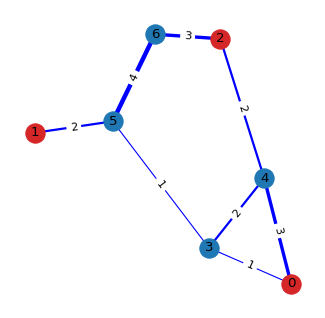

In [ ]:
show_graph(Sp1)

--- 0.0011451244354248047 seconds ---
le poids est :8.0


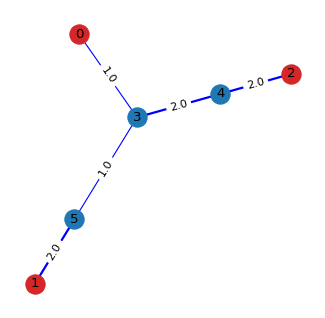

In [ ]:
start_time = time.time()

A=enumeration_algorithmp(Sp1,Dp1,P1)

print("--- %s seconds ---" % (time.time() - start_time))

print("le poids est :"+str(weight(A[0])))

show_graph(A)

voici le résultat
--- 0.011351346969604492 seconds ---
le poids est :8.0


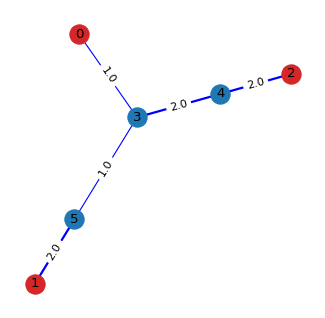

In [ ]:
start_time = time.time()

A=enumeration_algorithmk(Sp1,Dp1,P1)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

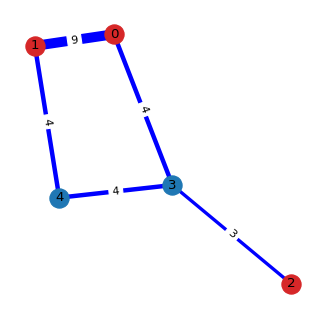

In [ ]:
show_graph(Sp2)

--- 0.0011889934539794922 seconds ---
le poids est :15.0


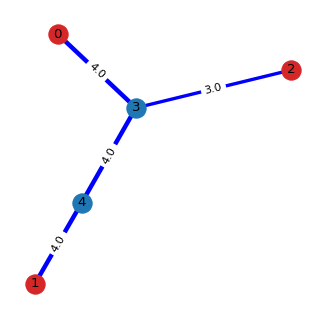

In [ ]:
start_time = time.time()

A=enumeration_algorithmp(Sp2,Dp2,P2)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

voici le résultat
--- 0.004700660705566406 seconds ---
le poids est :15.0


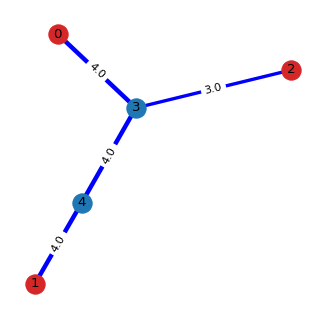

In [ ]:
start_time = time.time()

A=enumeration_algorithmk(Sp2,Dp2,P2)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

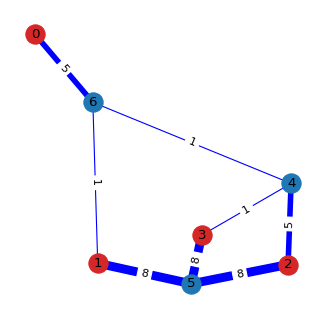

In [ ]:
show_graph(Sp3)

--- 0.003348112106323242 seconds ---
le poids est :13.0


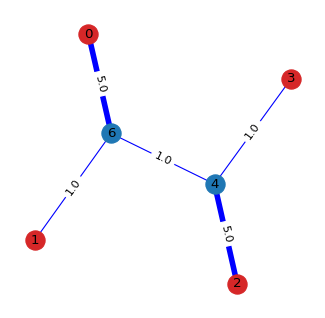

In [ ]:
start_time = time.time()

A=enumeration_algorithmp(Sp3,Dp3,P3)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

voici le résultat
--- 0.009257793426513672 seconds ---
le poids est :13.0


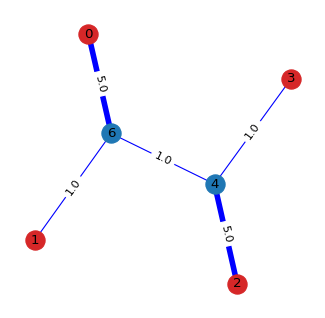

In [ ]:
start_time = time.time()

A=enumeration_algorithmk(Sp3,Dp3,P3)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

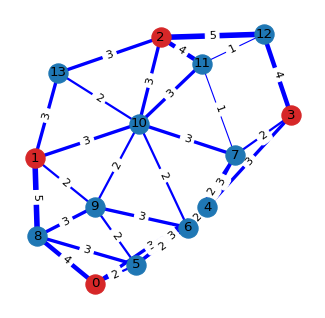

In [ ]:
show_graph(Sp4)

--- 0.014922142028808594 seconds ---
le poids est :16.0


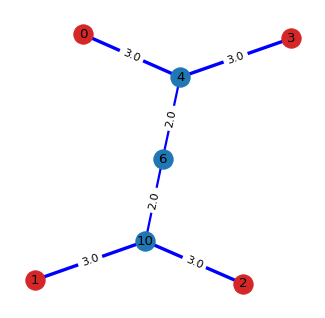

In [ ]:
start_time = time.time()

A=enumeration_algorithmp(Sp4,Dp4,P4)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

voici le résultat
--- 0.04548215866088867 seconds ---
le poids est :16.0


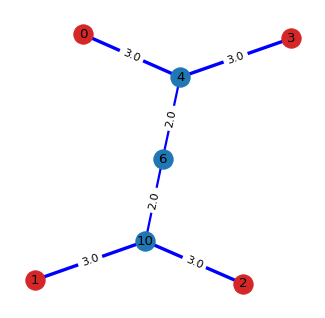

In [ ]:
start_time = time.time()

A=enumeration_algorithmk(Sp4,Dp4,P4)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

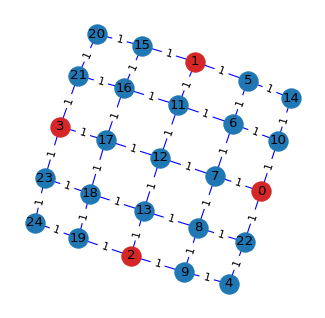

In [ ]:
show_graph(Sp5)

--- 0.03324389457702637 seconds ---
le poids est :8.0


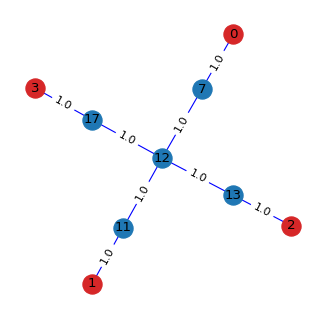

In [ ]:
start_time = time.time()

A=enumeration_algorithmp(Sp5,Dp5,P5)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

voici le résultat
--- 0.1153712272644043 seconds ---
le poids est :8.0


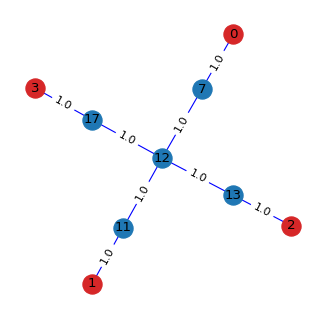

In [ ]:
start_time = time.time()

A=enumeration_algorithmk(Sp5,Dp5,P5)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

In [ ]:
#start_time = time.time()

#A=enumeration_algorithmp(Sp6,Dp6,P6)

#print("--- %s seconds ---" % (time.time() - start_time))

#show_graph(A)


The scenario 6 is too big for us to run it with such a naive algorithm. Thus an approximation algorithm is needed.

# Question 12 : Distance Network Heuristic

In [ ]:
#Implementation of the Distance Network Heuristic, both with Kruskal and Prim's algorithm

def DNHk(S,Dp,P):
  A,k,n=S[0],S[1],S[2]
  G=A.copy()
  D,Pred=Dp,P
  Dk=[D[i][0:k] for i in range (0,k)]
  T=kruskal(Dk).toarray()
  SG=max_int*np.ones((n,n))
  for i1 in range (0,k):
    for j1 in range (0,k):
      if T[i1][j1]>0:
        #print("waw le couple c'est"+str((i2,j)))
        j=j1
        while j!=i1:
          couple=(j,int(Pred[i1][j]))
          #print(couple)
          SG[couple[0]][couple[1]]=A[couple[0]][couple[1]]
          SG[couple[1]][couple[0]]=A[couple[1]][couple[0]]
          j=int(Pred[i1][j])
  T2=kruskal(SG).toarray()
  FT=[] #l'ensemble des feuilles non terminales
  presence_feuilles=True
  while presence_feuilles==True: 
    presence_feuilles=False
    for i in range (k,n):
      voisins = np.argwhere(0<G[i])
      if len(voisins)==1:
        FT.append(i)
        i2=voisins[0]
        T2[i][i2]=0
        T2[i2][i]=0
        presence_feuilles=True
  return(T2,k,n)

def DNHp(S,Dp,P):
  A,k,n=S[0],S[1],S[2]
  G=A.copy()
  D,Pred=Dp,P
  Dk=[D[i][0:k] for i in range (0,k)]
  T=prim(Dk)
  SG=max_int*np.ones((n,n))
  for i1 in range (0,k):
    for j1 in range (0,k):
      if T[i1][j1]>0:
        #print("waw le couple c'est"+str((i2,j)))
        j=j1
        while j!=i1:
          couple=(j,int(Pred[i1][j]))
          #print(couple)
          SG[couple[0]][couple[1]]=A[couple[0]][couple[1]]
          SG[couple[1]][couple[0]]=A[couple[1]][couple[0]]
          j=int(Pred[i1][j])
  T2=prim(SG)
  FT=[] #l'ensemble des feuilles non terminales
  presence_feuilles=True
  while presence_feuilles==True: 
    presence_feuilles=False
    for i in range (k,n):
      voisins = np.argwhere(0<G[i])
      if len(voisins)==1:
        FT.append(i)
        i2=voisins[0]
        T2[i][i2]=0
        T2[i2][i]=0
        presence_feuilles=True
  return(T2,k,n)
        



The data structure used here consists of a nxn distance matrix D which is given by Floyd Warshall and a matrix Pred which gives the precedent vertex at (i,j) for the path from i to j. Pred is also computed via Floyd-Warshall.

An MST is computed with Kruskal or Prim, and it's transformed to a subgraph of G with a blank matrix which is progressively updated according to the shortest paths.

The MST and the final Steiner Tree can then be computed easily.

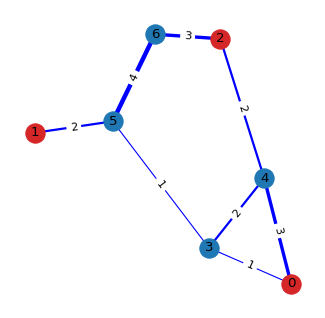

In [ ]:
show_graph(Sp1)

--- 0.0012850761413574219 seconds ---
le poids est :9.0


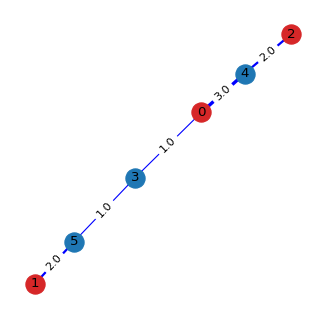

In [ ]:
start_time = time.time()

A=DNHp(Sp1,Dp1,P1)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

--- 0.0037033557891845703 seconds ---
le poids est :9.0


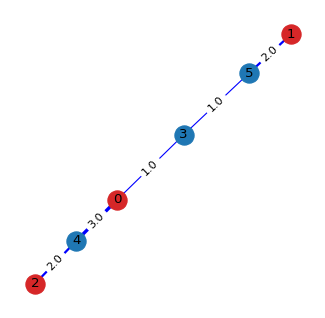

In [ ]:
start_time = time.time()

A=DNHk(Sp1,Dp1,P1)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

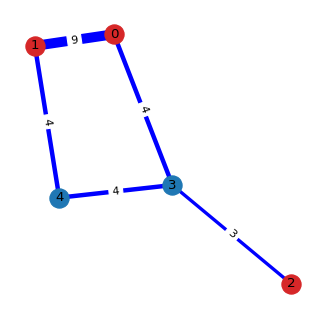

In [ ]:
show_graph(Sp2)

--- 0.0010161399841308594 seconds ---
le poids est :16.0


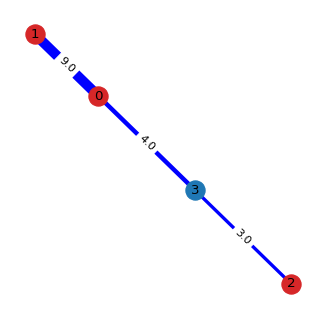

In [ ]:
start_time = time.time()

A=DNHp(Sp2,Dp2,P2)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

--- 0.0019919872283935547 seconds ---
le poids est :16.0


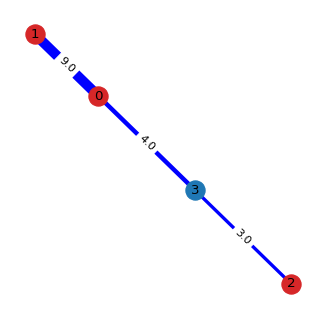

In [ ]:
start_time = time.time()

A=DNHk(Sp2,Dp2,P2)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

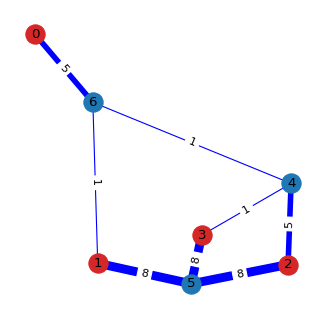

In [ ]:
show_graph(Sp3)

--- 0.0009138584136962891 seconds ---
le poids est :13.0


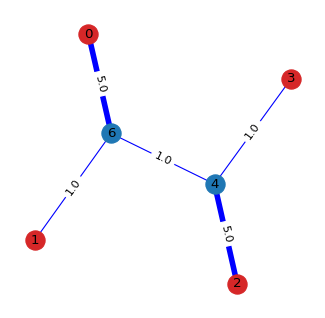

In [ ]:
start_time = time.time()

A=DNHp(Sp3,Dp3,P3)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

--- 0.0031156539916992188 seconds ---
le poids est :13.0


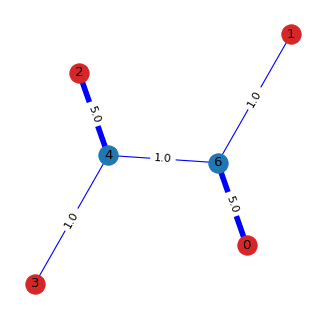

In [ ]:
start_time = time.time()

A=DNHk(Sp3,Dp3,P3)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

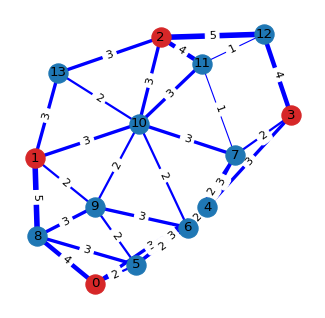

In [ ]:
show_graph(Sp4)

--- 0.0015804767608642578 seconds ---
le poids est :18.0


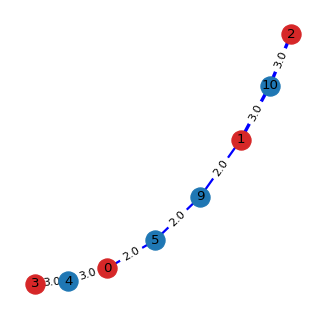

In [ ]:
start_time = time.time()

A=DNHp(Sp4,Dp4,P4)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

--- 0.005444049835205078 seconds ---
le poids est :18.0


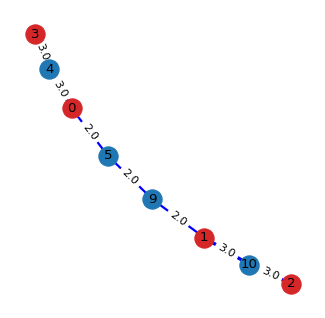

In [ ]:
start_time = time.time()

A=DNHk(Sp4,Dp4,P4)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

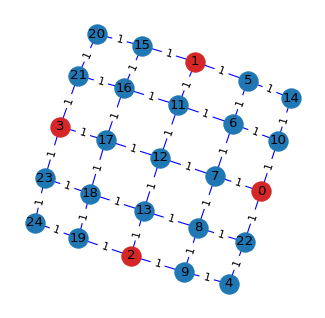

In [ ]:
show_graph(Sp5)

--- 0.010317564010620117 seconds ---
le poids est :10.0


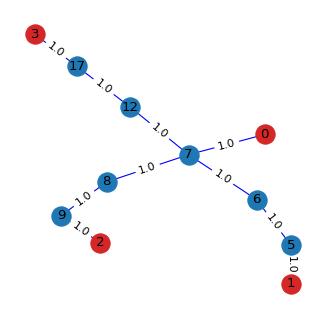

In [ ]:
start_time = time.time()

A=DNHp(Sp5,Dp5,P5)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

--- 0.0058383941650390625 seconds ---
le poids est :10.0


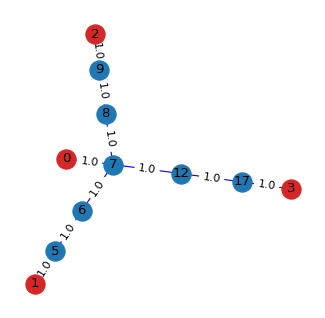

In [ ]:
start_time = time.time()

A=DNHk(Sp5,Dp5,P5)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

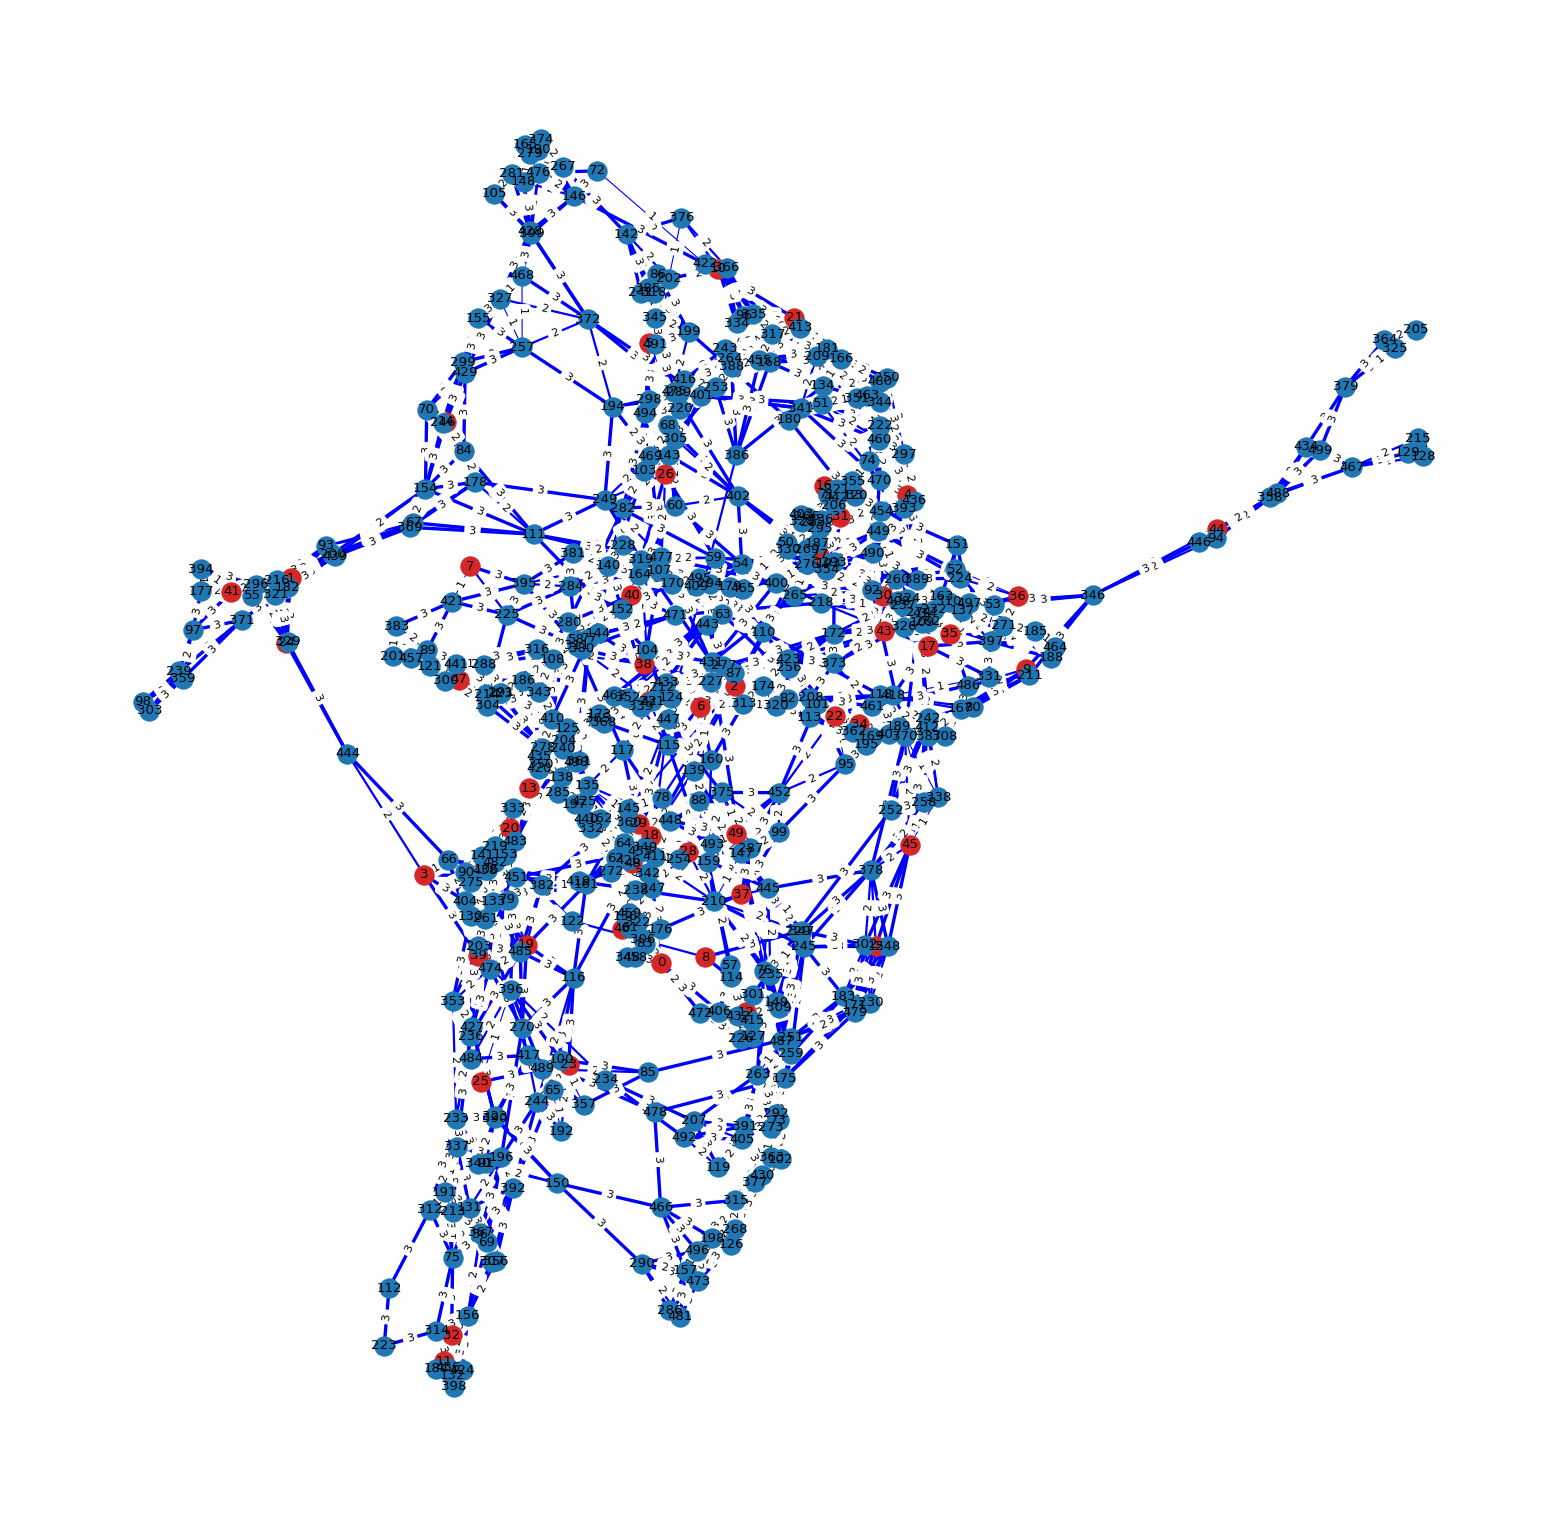

In [ ]:
show_graph(Sp6)

--- 0.392869234085083 seconds ---
le poids est :267.0


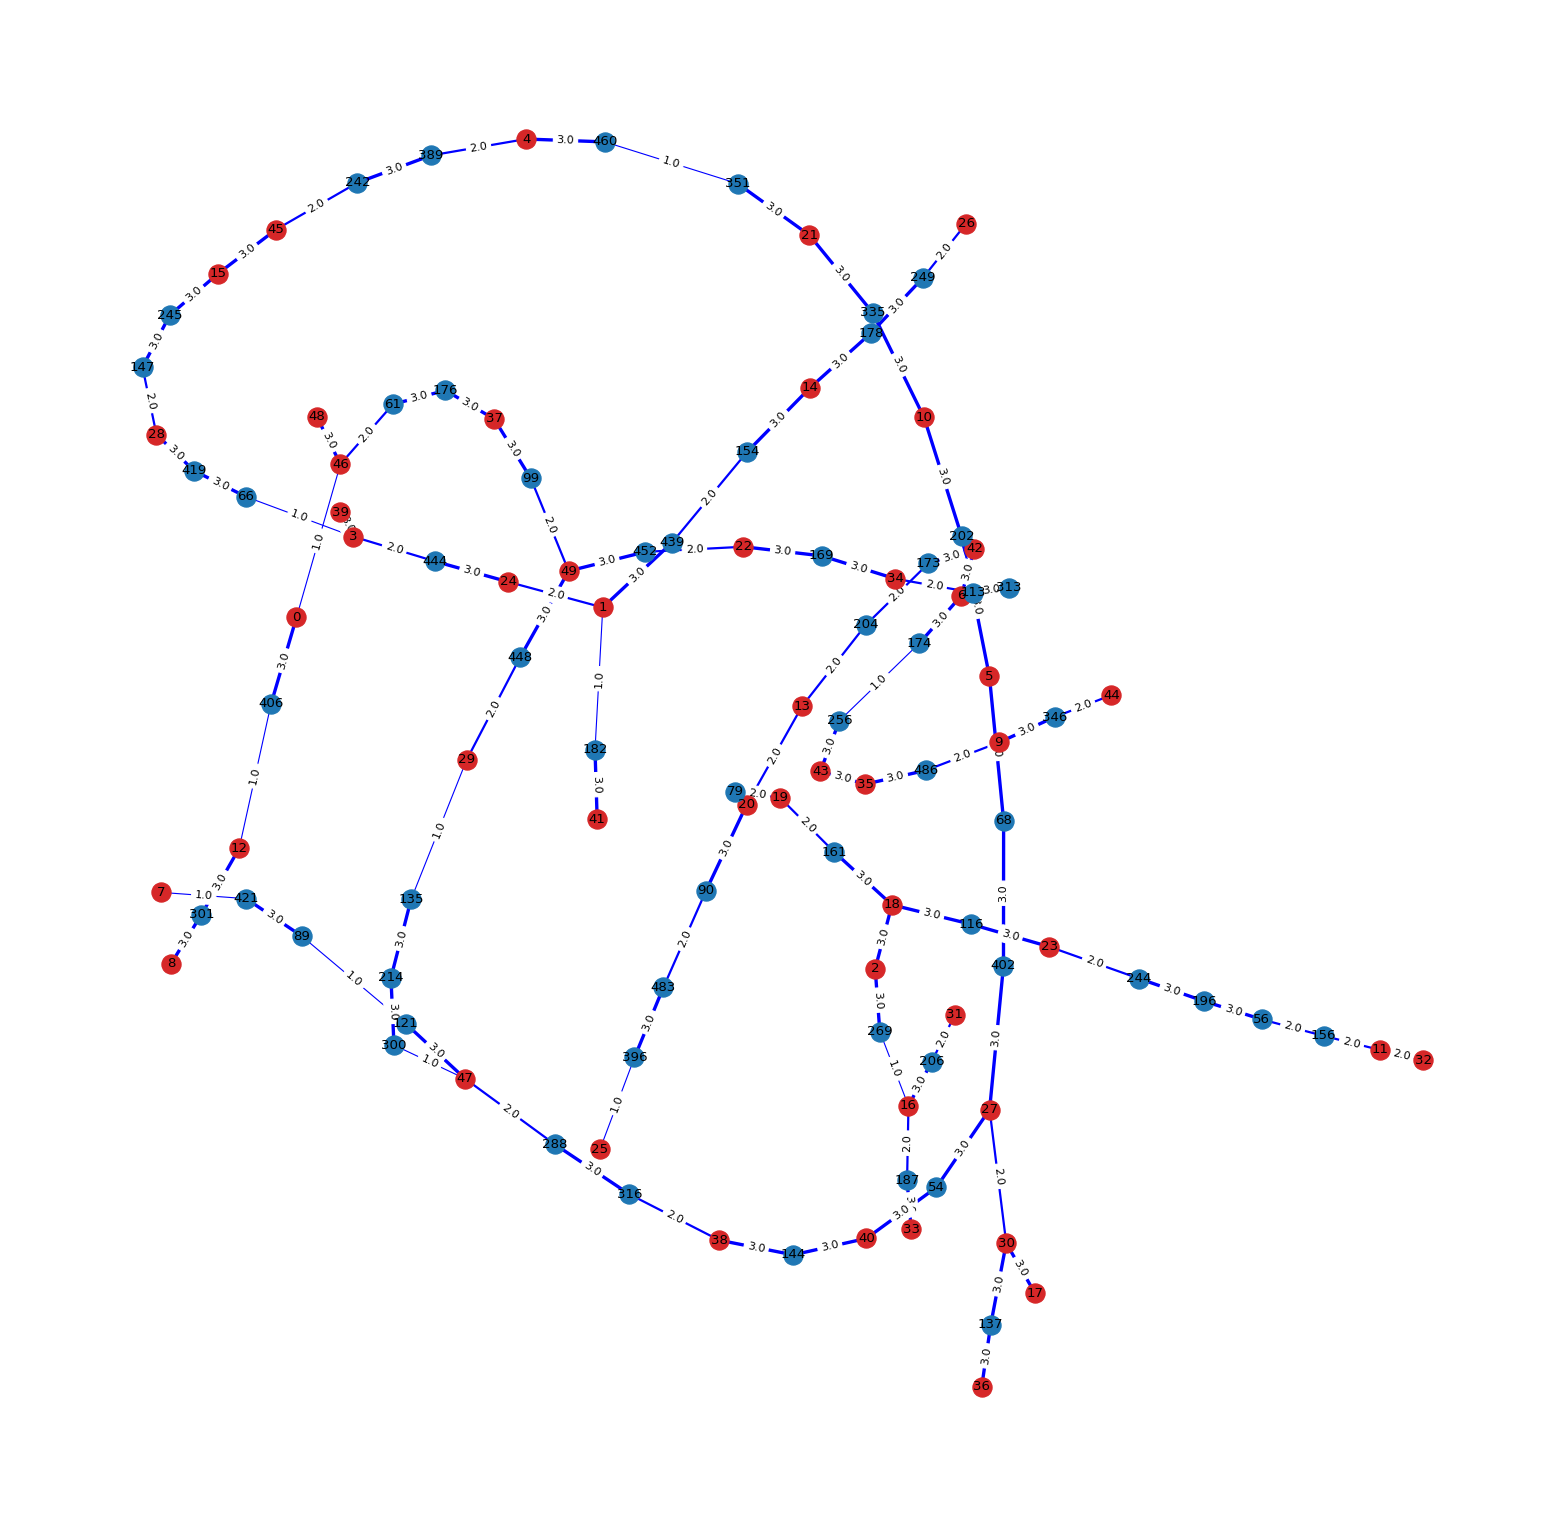

In [ ]:
start_time = time.time()

A=DNHp(Sp6,Dp6,P6)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

--- 0.056876182556152344 seconds ---
le poids est :267.0


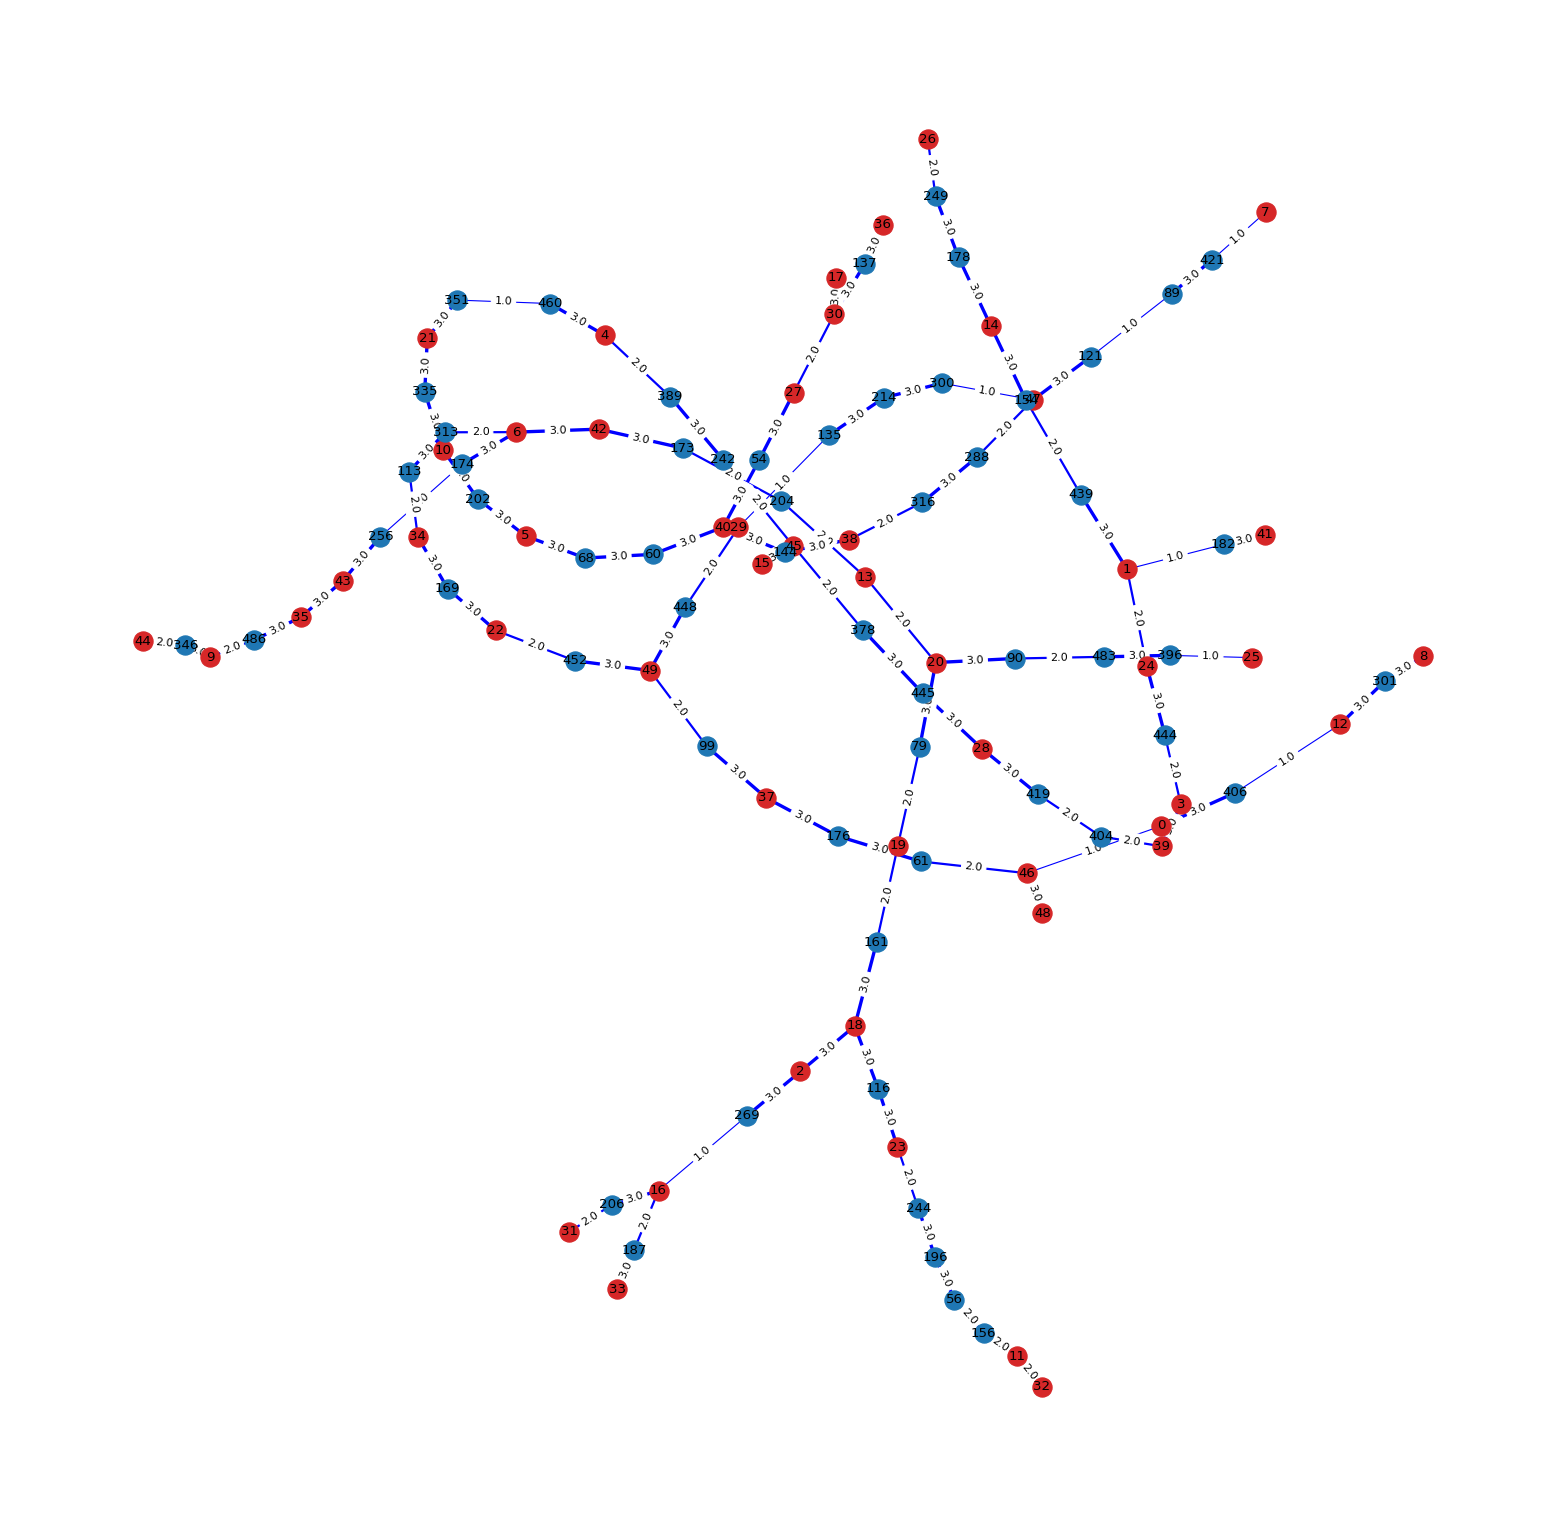

In [ ]:
start_time = time.time()

A=DNHk(Sp6,Dp6,P6)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

In [ ]:
print(weight(DNHp(Sp6,Dp6,P6)[0]))
print(weight(DNHk(Sp6,Dp6,P6)[0]))
#1 min 48 avec kruskal
#au moins 4 minutes avec prim versions 1 et 2

267.0
267.0


In [ ]:
Sp=pre_process(S6,D6)
#1 min 45 s sur le FW2
#puis blocage sur 81

2 oui
2 non
1 oui
2 oui
2 non
1 non
3 non


In [ ]:
#a=DNHk(Sp)
#print(weight(a[0]))
#résultat : le poids est de 2440000267.0, le temps d'exécution est de 1min45s
a=DNHp(Sp,D6,P6)
print(weight(a[0]))

267.0


# Question 13 : Shortest-Path Heuristic

In [ ]:
#Implementation of the Shortest-Path Heuristic, both with Kruskal and Prim's algorithm

def SPHk(S,Dp,P): #il ne faut pas que la matrice soit sous une forme avec des 0 sinon ça ne fonctionnera pas
  A,k,n=S[0],S[1],S[2]
  G=A.copy()
  D,Pred=Dp,P
  Q=Fheap()
  TMN=[0 for i in range (0,k)]
  E=[[max_int for i in range (0,n)] for i in range (0,n)]
  for i in range (1,k):
    N=Node(D[0][i])
    Q.insert(N)
    TMN[i]=N
  n0=1
  while n0<k:
    N=Q.extract_min()
    for i in range(0,k):
      if N==TMN[i]:
        value=i
    km=value
    TMN[km]=0
    n0+=1
    im=[i for i in range (0,k) if D[km][i]==N.key and TMN[i]==0][0] 
    a,b=im,km
    c=int(Pred[a][b])
    while c!=a:
      E[c][b]=G[c][b]
      E[b][c]=G[b][c]
      b=c
      c=int(Pred[a][c])
    i=0
    for N2 in TMN:
      if N2!=0 and D[i][km]<N2.key:
        Q.decrease_key(N2,D[i][km])
      i+=1
    E[c][b]=G[c][b]
    E[b][c]=G[b][c] 
    E=kruskal(E).toarray()
    i=0
    
  print(n0)
  print(E)
  return(E,k,n)
    

def SPHp(S,Dp,P): #il ne faut pas que la matrice soit sous une forme avec des 0 sinon ça ne fonctionnera pas
  A,k,n=S[0],S[1],S[2]
  G=A.copy()
  D,Pred=Dp,P
  Q=Fheap()
  TMN=[0 for i in range (0,k)]
  E=[[max_int for i in range (0,n)] for i in range (0,n)]
  for i in range (1,k):
    N=Node(D[0][i])
    Q.insert(N)
    TMN[i]=N
  n0=1
  while n0<k:
    N=Q.extract_min()
    for i in range(0,k):
      if N==TMN[i]:
        value=i
    km=value
    TMN[km]=0
    n0+=1
    im=[i for i in range (0,k) if D[km][i]==N.key and TMN[i]==0][0] 
    a,b=im,km
    c=int(Pred[a][b])
    while c!=a:
      E[c][b]=G[c][b]
      E[b][c]=G[b][c]
      b=c
      c=int(Pred[a][c])
    i=0
    for N2 in TMN:
      if N2!=0 and D[i][km]<N2.key:
        Q.decrease_key(N2,D[i][km])
      i+=1
    E[c][b]=G[c][b]
    E[b][c]=G[b][c] 
    E=prim(E)
    for i in range (0,len(E)):
      for u in range (0,len(E)):
        if E[i][u]==0:
          E[i][u]=max_int
        if max_int>E[i][u]>0:
          E[u][i]=E[i][u]
    
  print(n0)
  print(E)
  return(E,k,n)

In order to compute the distances from each terminal to the tree T, we use here a Fibonacci heap structure, where each node represents a terminal which is not yet in the tree, and the key is its distance to the tree T which is being built iteratively.

At each of the k iterations, a terminal node is added to the tree.

Again, the tree is stored in an nxn adjacency matrix E which is updated at each iteration.

The shortest paths are computed using Floyd Warshall 2 outside this algorithm, the result of which are the parameters Dp and P.


3
[[10000000, 10000000, 10000000, 1, 3, 10000000, 10000000, 10000000, 10000000], [10000000, 10000000, 10000000, 10000000, 10000000, 2, 10000000, 10000000, 10000000], [10000000, 10000000, 10000000, 10000000, 2, 10000000, 10000000, 10000000, 10000000], [1, 10000000, 10000000, 10000000, 10000000, 1, 10000000, 10000000, 10000000], [3, 10000000, 2, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000], [10000000, 2, 10000000, 1, 10000000, 10000000, 10000000, 10000000, 10000000], [10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000], [10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000], [10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000]]
--- 0.0037508010864257812 seconds ---
le poids est :9


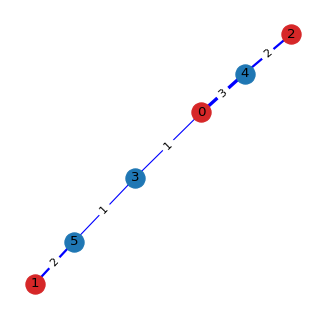

In [ ]:
start_time = time.time()

A=SPHp(Sp1,Dp1,P1)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

3
[[0.e+00 0.e+00 0.e+00 1.e+00 3.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 2.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 2.e+00 0.e+00 1.e+00 0.e+00 0.e+00 0.e+00 1.e+07 1.e+07]
 [0.e+00 0.e+00 1.e+07 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]]
--- 0.008933067321777344 seconds ---
le poids est :9.0


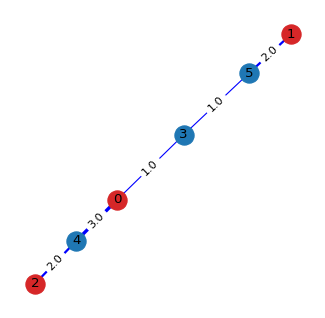

In [ ]:
start_time = time.time()

A=SPHk(Sp1,Dp1,P1)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

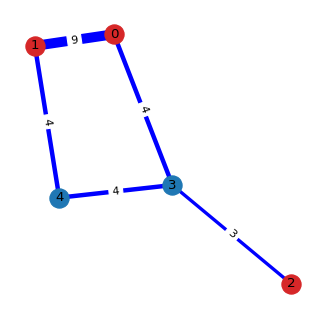

In [ ]:
show_graph(Sp2)

3
[[10000000, 9, 10000000, 4, 10000000, 10000000, 10000000], [9, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000], [10000000, 10000000, 10000000, 3, 10000000, 10000000, 10000000], [4, 10000000, 3, 10000000, 10000000, 10000000, 10000000], [10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000], [10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000], [10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000]]
--- 0.0008723735809326172 seconds ---
le poids est :16


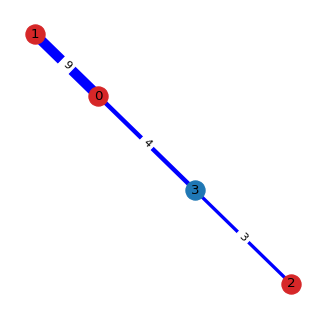

In [ ]:
start_time = time.time()

A=SPHp(Sp2,Dp2,P2)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

In [ ]:
start_time = time.time()

A=SPHk(Sp2,Dp2,P2)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

In [ ]:
show_graph(Sp3)

In [ ]:
start_time = time.time()

A=SPHp(Sp3,Dp3,P3)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

In [ ]:
start_time = time.time()

A=SPHk(Sp3,Dp3,P3)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

In [ ]:
show_graph(Sp4)

In [ ]:
start_time = time.time()

A=SPHp(Sp4,Dp4,P4)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

In [ ]:
start_time = time.time()

A=SPHk(Sp4,Dp4,P4)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

In [ ]:
show_graph(Sp5)

In [ ]:
start_time = time.time()

A=SPHp(Sp5,Dp5,P5)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

In [ ]:
start_time = time.time()

A=SPHk(Sp5,Dp5,P5)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

In [ ]:
show_graph(Sp6)

50
[[10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 1, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10

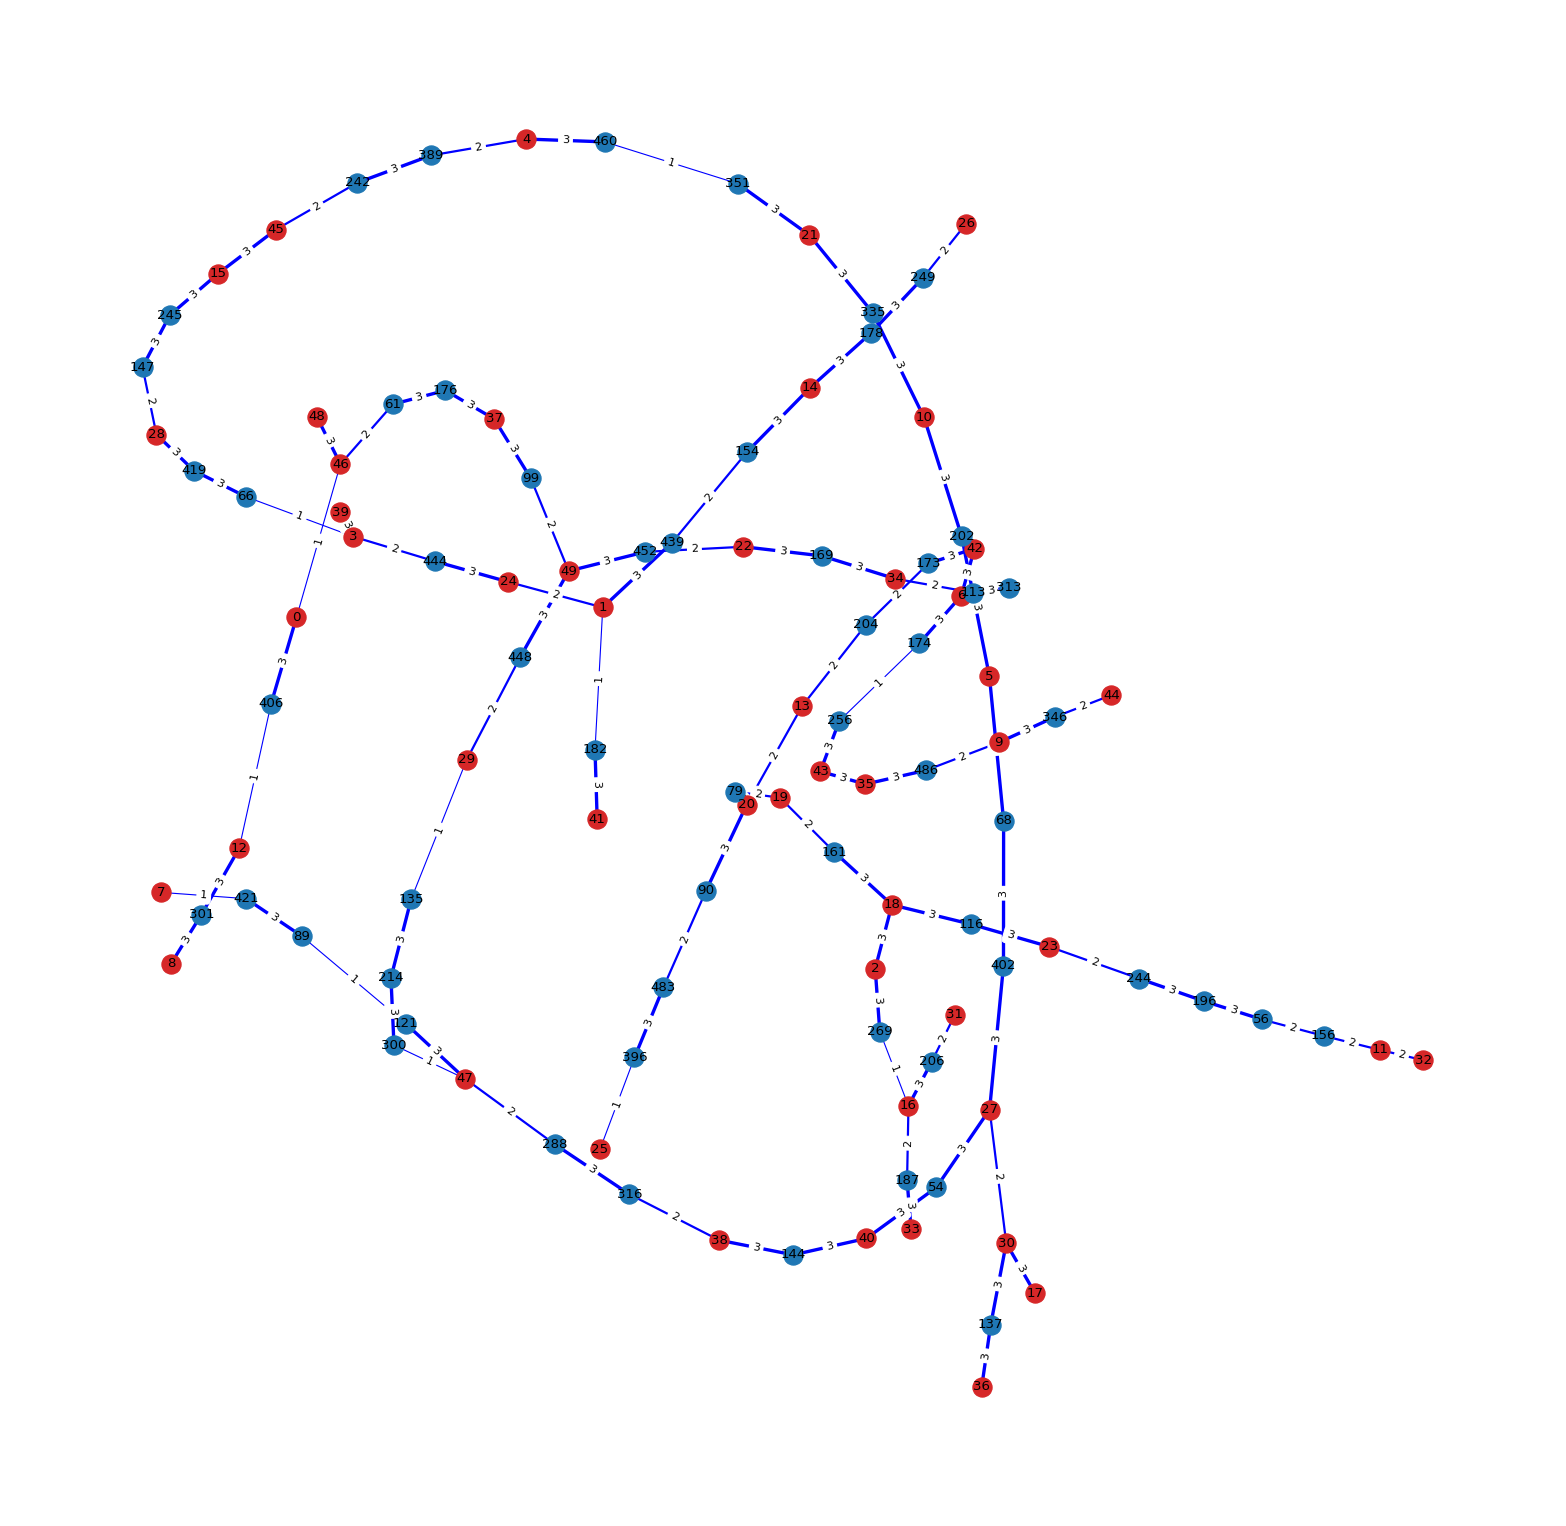

In [ ]:
start_time = time.time()

A=SPHp(Sp6,Dp6,P6)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

50
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
--- 0.39722299575805664 seconds ---
le poids est :267.0


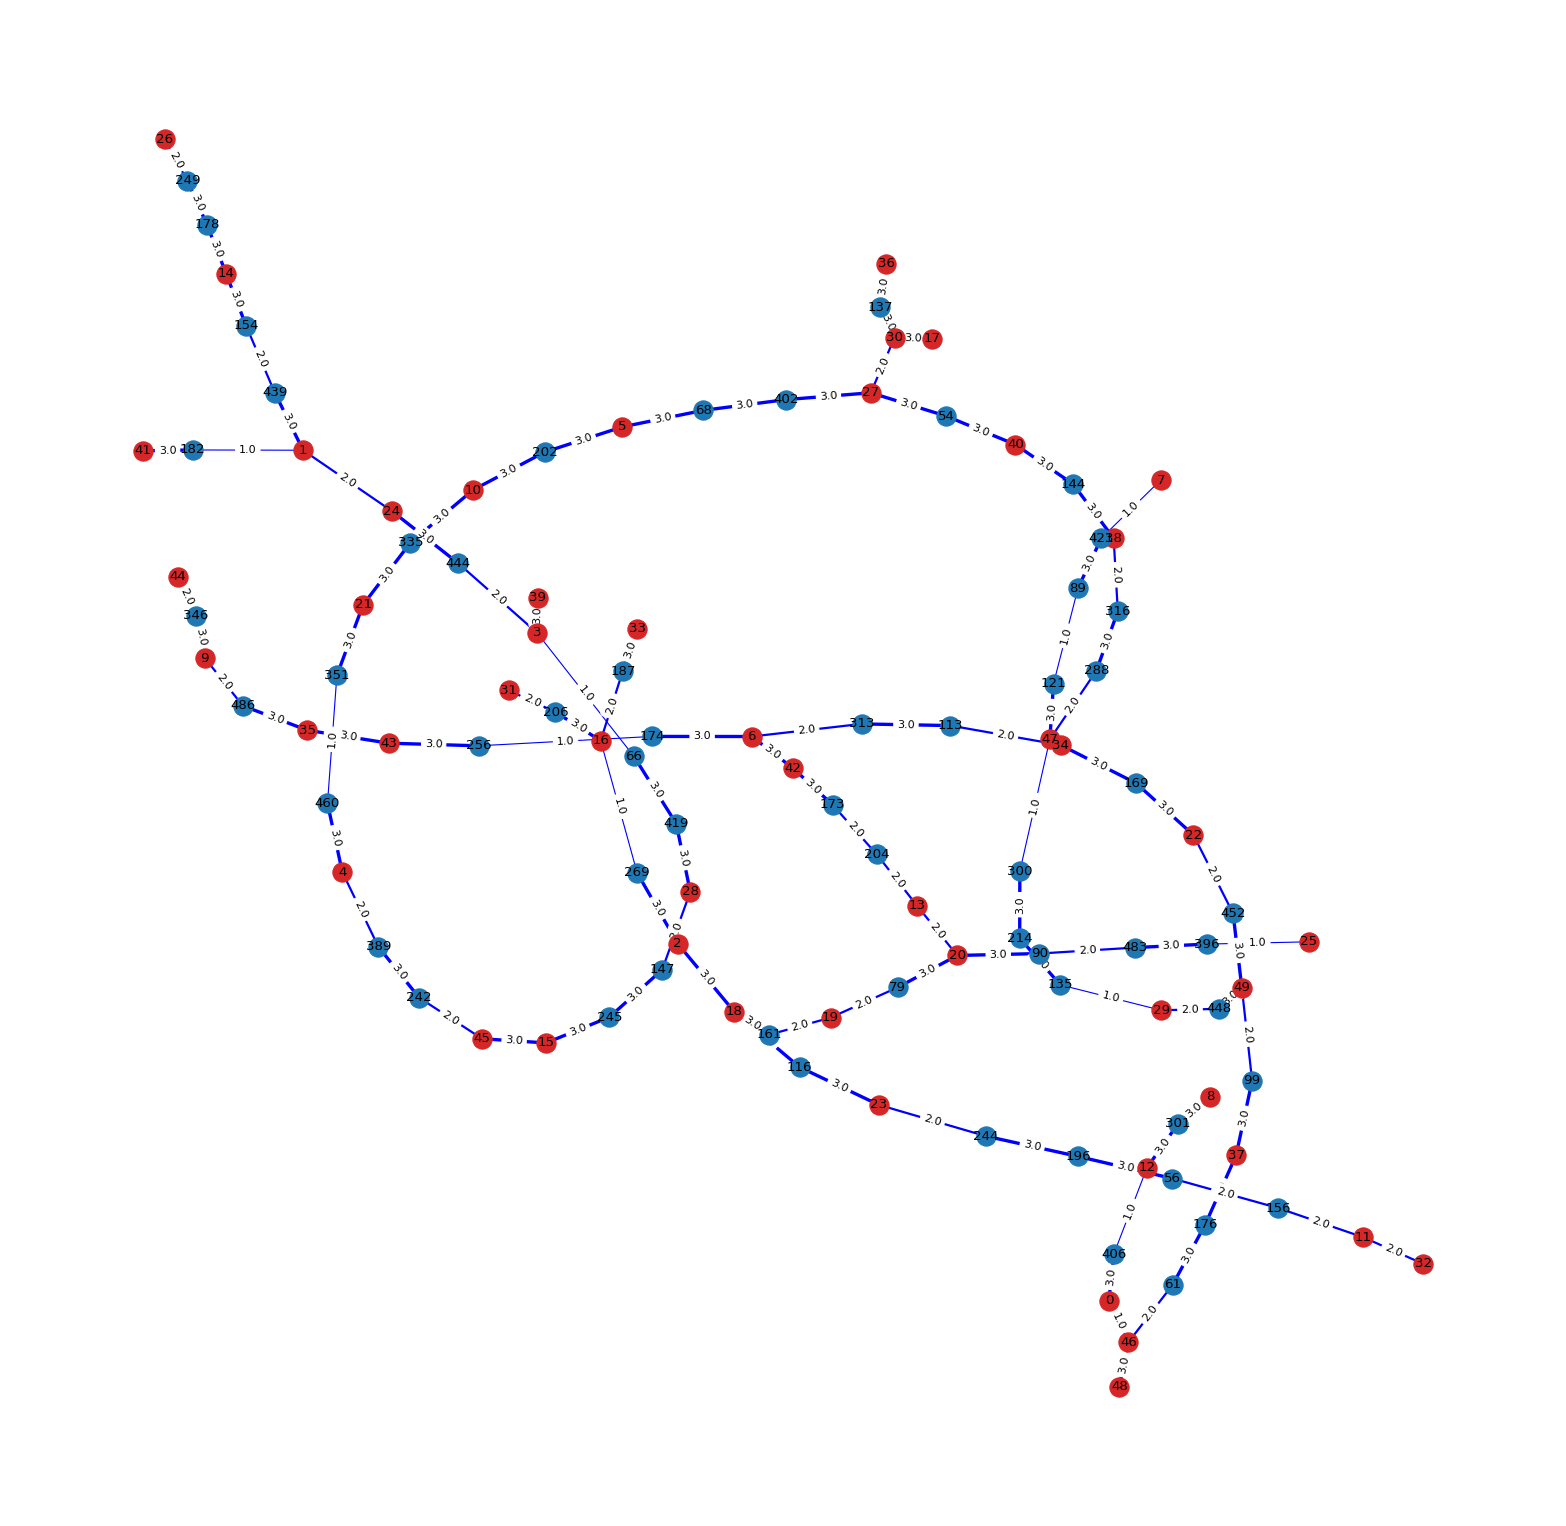

In [ ]:
start_time = time.time()

A=SPHk(Sp6,Dp6,P6)

print("--- %s seconds ---" % (time.time() - start_time))
print("le poids est :"+str(weight(A[0])))
show_graph(A)

In [ ]:
print(weight(DNHp(Sp6,Dp6,P6)[0]))
print(weight(DNHk(Sp6,Dp6,P6)[0]))
#1 min 48 avec kruskal
#au moins 4 minutes avec prim versions 1 et 2

267.0
267.0


# Question 14



${Distance-Network-Heuristic}$

The complexity of Floyd Warshall is $O(n^3)$, which dominates the complexity of Prim/Kruskal algorithms, as well as the computing of the subgraph of G ($O(n^2)$)  and the removal of non-terminal leaves ($O(n^2)$ in the worst case).

**The complexity is thus $O(n^3)$.** Floyd Warshall algorithm is executed outside our DNH algorithm so the "inside complexity" is that of the MST algorithm we're using. ($O(n^2)$ for Prim, $O(n^2log(n))$ for Kruskal)

${Shortest-Path-Heuristic}$

Since extract_min has a mere complexity of $O(log(n))$ and the other Fibonacci heap basic operations used here are constant in time, those operations won't determine the complexity. The MST-computing algorithm is applied k times, thus giving a complexity of $O(n^2log(n)*k)$ with Kruskal and $O(n^2*k)$ with Prim.

Since Floyd-Warshall is once again used here, the complexity remains $O(n^3)$ with Prim, and $O(n^3+n^2log(n)*k)$ with Kruskal.

${Conclusion}$

The complexities are, indeed, polynomial.

#Algorithme de Dreyfus-Wagner

## Fibonacci Heap avec value

In [ ]:
import math
import numpy as np


class FibonacciHeap: #source Github Daniel Borowski

    # internal node class
    class Node:
        def __init__(self, key, value):
            self.key = key
            self.value = value
            self.parent = self.child = self.left = self.right = None
            self.degree = 0
            self.mark = False

    # function to iterate through a doubly linked list
    def iterate(self, head):
        node = stop = head
        flag = False
        while True:
            if node == stop and flag is True:
                break
            elif node == stop:
                flag = True
            yield node
            node = node.right

    # pointer to the head and minimum node in the root list
    root_list, min_node = None, None

    # maintain total node count in full fibonacci heap
    total_nodes = 0

    # return min node in O(1) time
    def find_min(self):
        return self.min_node

    # extract (delete) the min node from the heap in O(log n) time
    # amortized cost analysis can be found here (http://bit.ly/1ow1Clm)
    def extract_min(self):
        z = self.min_node
        if z is not None:
            if z.child is not None:
                # attach child nodes to root list
                children = [x for x in self.iterate(z.child)]
                for i in range(0, len(children)):
                    self.merge_with_root_list(children[i])
                    children[i].parent = None
            self.remove_from_root_list(z)
            # set new min node in heap
            if z == z.right:
                self.min_node = self.root_list = None
            else:
                self.min_node = z.right
                self.consolidate()
            self.total_nodes -= 1
        return z

    # insert new node into the unordered root list in O(1) time
    # returns the node so that it can be used for decrease_key later
    def insert(self, key, value=None):
        n = self.Node(key, value)
        n.left = n.right = n
        self.merge_with_root_list(n)
        if self.min_node is None or n.key < self.min_node.key:
            self.min_node = n
        self.total_nodes += 1
        return n

    # modify the key of some node in the heap in O(1) time
    def decrease_key(self, x, k):
        if k > x.key:
            return None
        x.key = k
        y = x.parent
        if y is not None and x.key < y.key:
            self.cut(x, y)
            self.cascading_cut(y)
        if x.key < self.min_node.key:
            self.min_node = x

    # merge two fibonacci heaps in O(1) time by concatenating the root lists
    # the root of the new root list becomes equal to the first list and the second
    # list is simply appended to the end (then the proper min node is determined)
    def merge(self, h2):
        H = FibonacciHeap()
        H.root_list, H.min_node = self.root_list, self.min_node
        # fix pointers when merging the two heaps
        last = h2.root_list.left
        h2.root_list.left = H.root_list.left
        H.root_list.left.right = h2.root_list
        H.root_list.left = last
        H.root_list.left.right = H.root_list
        # update min node if needed
        if h2.min_node.key < H.min_node.key:
            H.min_node = h2.min_node
        # update total nodes
        H.total_nodes = self.total_nodes + h2.total_nodes
        return H

    # if a child node becomes smaller than its parent node we
    # cut this child node off and bring it up to the root list
    def cut(self, x, y):
        self.remove_from_child_list(y, x)
        y.degree -= 1
        self.merge_with_root_list(x)
        x.parent = None
        x.mark = False

    # cascading cut of parent node to obtain good time bounds
    def cascading_cut(self, y):
        z = y.parent
        if z is not None:
            if y.mark is False:
                y.mark = True
            else:
                self.cut(y, z)
                self.cascading_cut(z)

    # combine root nodes of equal degree to consolidate the heap
    # by creating a list of unordered binomial trees
    def consolidate(self):
        A = [None] * int(math.log(self.total_nodes) * 2)
        nodes = [w for w in self.iterate(self.root_list)]
        for w in range(0, len(nodes)):
            x = nodes[w]
            d = x.degree
            while A[d] != None:
                y = A[d]
                if x.key > y.key:
                    temp = x
                    x, y = y, temp
                self.heap_link(y, x)
                A[d] = None
                d += 1
            A[d] = x
        # find new min node - no need to reconstruct new root list below
        # because root list was iteratively changing as we were moving
        # nodes around in the above loop
        for i in range(0, len(A)):
            if A[i] is not None:
                if A[i].key < self.min_node.key:
                    self.min_node = A[i]

    # actual linking of one node to another in the root list
    # while also updating the child linked list
    def heap_link(self, y, x):
        self.remove_from_root_list(y)
        y.left = y.right = y
        self.merge_with_child_list(x, y)
        x.degree += 1
        y.parent = x
        y.mark = False

    # merge a node with the doubly linked root list
    def merge_with_root_list(self, node):
        if self.root_list is None:
            self.root_list = node
        else:
            node.right = self.root_list.right
            node.left = self.root_list
            self.root_list.right.left = node
            self.root_list.right = node

    # merge a node with the doubly linked child list of a root node
    def merge_with_child_list(self, parent, node):
        if parent.child is None:
            parent.child = node
        else:
            node.right = parent.child.right
            node.left = parent.child
            parent.child.right.left = node
            parent.child.right = node

    # remove a node from the doubly linked root list
    def remove_from_root_list(self, node):
        if node == self.root_list:
            self.root_list = node.right
        node.left.right = node.right
        node.right.left = node.left

    # remove a node from the doubly linked child list
    def remove_from_child_list(self, parent, node):
        if parent.child == parent.child.right:
            parent.child = None
        elif parent.child == node:
            parent.child = node.right
            node.right.parent = parent
        node.left.right = node.right
        node.right.left = node.left

##Question 9


D'après les remarques de l'énoncé, on en déduit que $$s_v(X\cup v) = \min_{A\cup B =X}(s(A\cup v) + s(B\cup v)$$

(avec $A$ et $B$ non vides et disjoints) et que $$s(X\cup v) = \min\left[s_v(X\cup v),\min_{w \notin X}(s_w(X\cup w) +d(w,v)),\min_{w\in X}(s(x) + d(w,v))\right]$$

##Question 10

On implémente donc l'algorithme de Dreyfus Wagner de manière dynamique, en calculant toutes les solutions optimales, grâce aux deux équations précédentes, des instances de la forme $(X'\cup v)$ avec $X'\subset K$ et $v\in V$. Pour cela, on initialise avec les arbres ${x}$, de poids 0 et ne contenant que le noeud {x}, pour
tout $x\in V$, et on les insère tous dans une file de priorité $L$, associés à leur poids. Au début de chaque itération,
le premier élément $T(X1\cup u)$ de $L$ est extrait. Pour tout arc $(v, u)$, $T(X1\cup v)$ est inséré dans $L$
avec le poids $c((v, u)) + s(X1\cup u)$, ou s’il était déjà présent, il remplace l’ancien $T(X1,v)$
s’il a un poids plus faible. De même, pour tout $X2\subset X$ disjoint de $X1$ tel que $T(X2\cup u)$ soit
dans $L$ ou en ait été extrait, l’arborescence $T(X1\cup X2)$ est insérée dans $L$ avec le poids
$s(T(X1\cup u)) + s(X2\cup u)$, ou remplace l’ancien $T(X1 \cup X2 \cup u)$ s’il était déjà présent et s’il a
un poids plus faible.
La propriété fondamentale de cet algorithme est que tout arbre $T(X1\cup u)$ extrait de $L$ a
un poids optimal.

In [ ]:
def disjoint_sublists(X, X1): #renvoie la liste des sous-ensembles de X privé de X1
    def subsets(s):
      if len(s) == 0:
        return [[]]
      subs = subsets(s[1:])
      return subs + [[s[0]] + sub for sub in subs]
    XminX1 = [x for x in X if x not in X1]
    
    print(XminX1)
    return subsets(XminX1)

In [ ]:
def merge_sorted(a, b): #fusionne deux listes triées
    c = []
    i = j = 0
    while i < len(a) and j < len(b):
        if a[i] < b[j]:
            c.append(a[i])
            i += 1
        else:
            c.append(b[j])
            j += 1
    c += a[i:]
    c += b[j:]
    return c

In [ ]:
def DW(S):
  [G,k,n] = S  
  print('n='+str(n))
  K = [x for x in range(k)]
  X = [x for x in range(n)]
  L = FibonacciHeap()
  ListNoeuds = []
  ListEns= []
  ListArbres = []
  for x in range(n):
    Tx = np.ones((n,n)) *max_int
    Tx[x][x] = 0
    No = L.insert(key =0, value = x )
    ListEns.append([[x],x])
    ListNoeuds.append(No)
    ListArbres.append(Tx)
  while True :
    Nod = L.extract_min()
    ind1 = Nod.value
    w = Nod.key
    [X1,u] = ListEns[ind1]
    T =  ListArbres[ind1]
    print('T.size = ' +str(T.shape))
    if merge_sorted(X1,[u])== K:
      print('return')
      return [T,w]
    voisins = np.argwhere(np.logical_and(G[u]>0,G[u]<max_int))
    for vl in voisins :
      v = vl[0] 
      Tbis = T.copy()
      print('Tbis.size = ' +str(Tbis.shape))
      print('G.size = ' +str(G.shape))
      print('u='+str(u))
      print('v='+str(v))
      Tbis[u][v]=G[u][v]
      Tbis[v][u]=G[u][v]
      print('done')
      if ListEns.count([X1,v]) > 0 : #==1 suffirait car on le maintient égal à 0 ou 1
        ind = ListEns.index([X1,v])
        Noeu = ListNoeuds[ind]
        L.decrease_key(Noeu, w +G[u][v])
        ListArbres[ind] = Tbis
      else :
        l = len(ListNoeuds)
        No = L.insert(key =w +G[u][v], value = l+1)
        ListNoeuds.append(No)
        ListArbres.append(Tbis)
        ListEns.append([X1,v])
    A = disjoint_sublists(X,X1)
    for X2 in A:
      if ListEns.count([X2,u])> 0 : #on ne considère que les cas où on a déjà fait le calcul pour (X2,u)
        print('X2=' + str(X2))
        mer = merge_sorted(X1,X2)
        ind2 =ListEns.index([X2,u])
        Noeu = ListNoeuds[ind2]
        w2 = Noeu.key
        T2 = ListArbres[ind2]
        Tmerge = np.maximum(T, T2).astype(int) #on fusionne les deux arbres
        if ListEns.count([mer,u])> 0:
          ind = ListEns.index([mer,u])
          Noeu = ListNoeuds[ind]
          weight = Noeu.key
          if weight > w +w2 :
            L.decrease_key(Noeu,w + w2)
            ListArbres[ind]= Tmerge
          else : 
            l = len(ListNoeuds)
            Nou = L.insert(key =w +w2 , value = l+1)
            ListNoeuds.append(Nou)
            ListArbres.append(Tmerge)
            ListEns.append([mer,u])
    print('une boucle de faite')  

In [ ]:
A = np.ones((2,2))
B= [[0,2],[2,0]]
int(np.maximum(A,B))

TypeError: ignored

In [ ]:
[T,w ] = DW(S5)

n=25
T.size = (25, 25)
Tbis.size = (25, 25)
G.size = (25, 25)
u=0
v=7
done
Tbis.size = (25, 25)
G.size = (25, 25)
u=0
v=10
done
Tbis.size = (25, 25)
G.size = (25, 25)
u=0
v=22
done
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
une boucle de faite
T.size = (25, 25)
Tbis.size = (25, 25)
G.size = (25, 25)
u=24
v=19
done
Tbis.size = (25, 25)
G.size = (25, 25)
u=24
v=23
done
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
une boucle de faite
T.size = (25, 25)
Tbis.size = (25, 25)
G.size = (25, 25)
u=23
v=3
done
Tbis.size = (25, 25)
G.size = (25, 25)
u=23
v=18
done
Tbis.size = (25, 25)
G.size = (25, 25)
u=23
v=24
done
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
X2=[23]
une boucle de faite
T.size = (25, 25)
Tbis.size = (25, 25)
G.size = (25, 25)
u=3
v=17
done
Tbis.size = (25, 25)
G.size = (25, 25)
u=3
v=21
done
Tbis.size = (25, 25)
G.size = (25, 25)
u=3
v=23
done
[0, 1, 

IndexError: ignored

In [ ]:
A

Ne parvenant pas à réaliser l'implémentation avec les files de priorité, je tente une approche récursive plus naïve, mais hélas elle donne un débordement de file de récursion.

In [ ]:
#On peut maintenant implémenter l'algorithme de Dreyfus-Wagner :
import sys
sys.setrecursionlimit(1000000)
def DW(S):
  [G,k,n] = S
  D = FW(G)

  def Sv(X,v):  
    bi_part = bi_partition(X)
    sv =max_int
    for [A,B] in bi_part:
      sv = min(sv,S(A+[v])+S(B+[v]))
    return sv
      
  def S(X):
    if len(X)==2 :
      return D[X[0]][X[1]]
    else:
      s = max_int
      v = X[-1] 
      VminX = [True]*n #complémentaire de X dans V
      for w in X :
        VminX[w]=False

      for w in range(n): # w not in X
        if VminX[w]:
          s = min(s,Sv(X[:-1],w) + D[v][w])
        elif w!=v :
          s = min(s,S(X[:-1])+ D[v][w])
      return min(s,Sv(X))
  return(S([i for i in range(k)]))

In [ ]:
DW(S1)

## Question 11

On obtient selon le pseudo-code détaillé ci-dessus, avec une implémentation en file de priorité de Fibonacci une complexité temporelle de $O(3^k n +2^k (k + n\log n  + m).$

#Analyse statistique

In [ ]:
# Création du graphe

n = 500
k= 50
L = 1
delta = 0.025

def Sstat():
  Loc = np.random.uniform(0,1,size = (n,2))

  Gstat = np.zeros((n,n),dtype = int)
  
  for i in range(n):
    for j in range(i+1,n):
      dist = np.linalg.norm(Loc[i]-Loc[j])
      if dist < delta : 
        Gstat[i][j] = 1
        Gstat[j][i] = 1
        
      elif dist < 2*delta :
        Gstat[i][j] = 2
        Gstat[j][i] = 2
        
      elif dist < 3*delta :
        Gstat[i][j] = 3
        Gstat[j][i] = 3
        
      else:
        Gstat[i][j] = max_int
        Gstat[j][i] = max_int
 
  Sstat = [Gstat,k,n]
  return [Sstat,Loc]

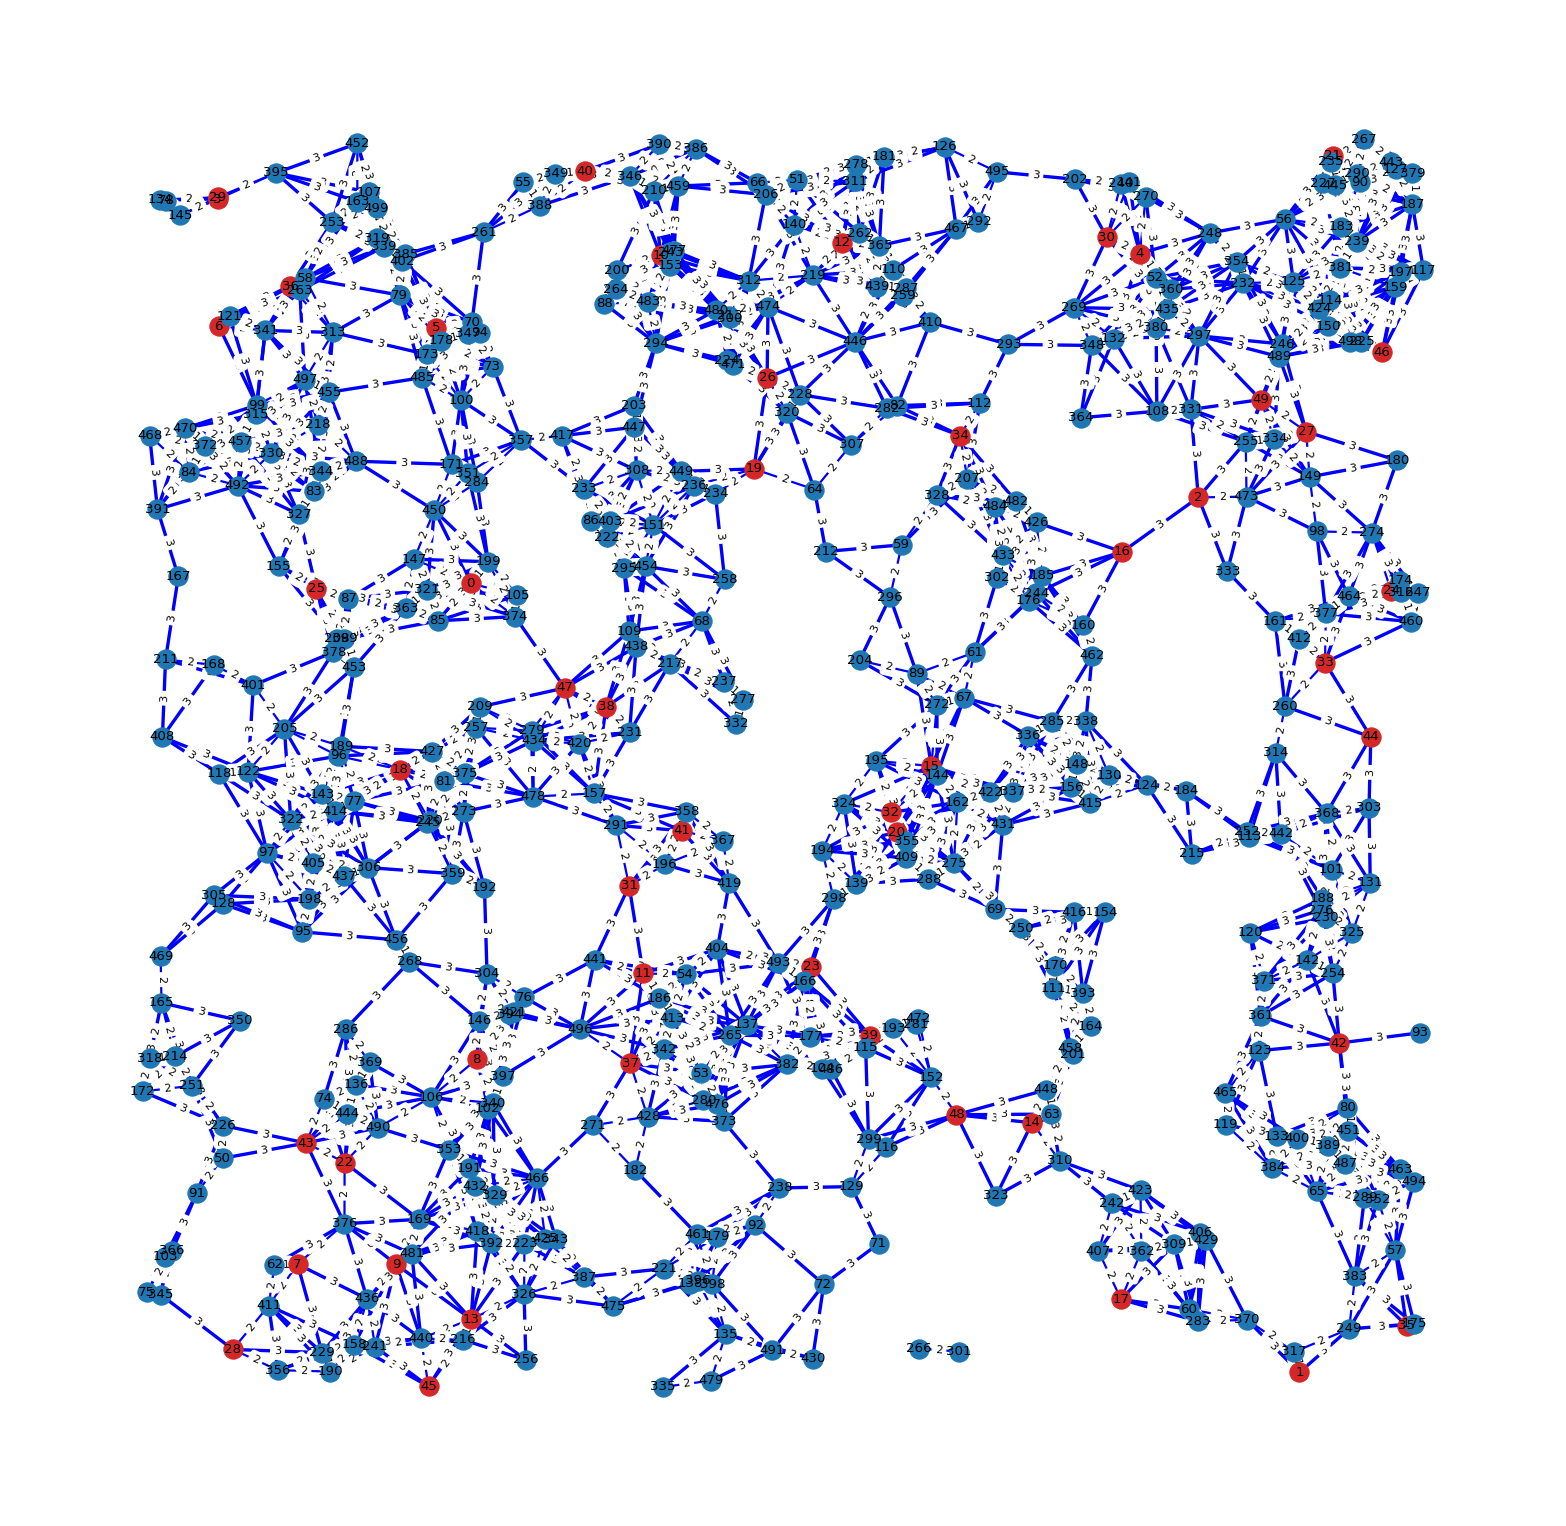

In [ ]:
#Affichons-le (ne pas oublier de mettre True et Loc en argument de show_graph)
Stat = Sstat()
S =Stat[0]
Loc = Stat[1]
show_graph(S,True,Loc)

In [ ]:
#On peut maintenant procéder à l'analyse statistique à proprement parler
#On décide de comparer les temps d'exécution et les poids obtenus


N_iter = 4
tSPH = 0
tDNH = 0
wSPH = 0
wDNH = 0

for i in range(N_iter):
  S = Sstat()[0]
  Dp,P = FW2(S[0])
  start_time = time.time() #On commence l'exécution de SPH
  A= SPHk(S,Dp,P)
  
  tSPH += time.time() - start_time
  wSPH += weight(A[0])

  start_time2 = time.time() #On commence l'exécution de SPH
  B = DNHk(S,Dp,P)
  
  tDNH += time.time() - start_time2
  wDNH += weight(B[0])

print("Temps moyen pour SPH : " + str(tSPH/N_iter))
print("Temps moyen pour DNH : " + str(tDNH/N_iter))
print("Poids moyen pour SPH : " + str(wSPH/N_iter))
print("Poids moyen pour DNH : " + str(wDNH/N_iter))

NameError: ignored

L'heuristique du distance network est certes un peu moins précise que la celle de la shortest path, mais elle est bien plus rapide !
(On n'étudie que jusque $N_iter = 4$ car pour $N_iter=10$ l'algorithme tourne plus d'une heure sans terminer).